In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Read in data

In [3]:
data = pd.read_csv('model_data/full_model_data.csv', index_col=0)

In [4]:
data.head()

URN  not_sustained_rate  total_absence  persistent_absence  \
1  137181            5.172414           11.1                38.1   
2  100049            6.250000           10.1                33.1   
3  100050            2.824859            7.9                24.8   
4  100051            5.464481           11.4                42.9   
5  100052            1.932367            8.2                24.0   

                               urban_rural            denomination   FSM  \
1  (England/Wales) Urban major conurbation  No religious character  41.2   
2  (England/Wales) Urban major conurbation  No religious character  63.5   
3  (England/Wales) Urban major conurbation  No religious character  35.6   
4  (England/Wales) Urban major conurbation  No religious character  61.8   
5  (England/Wales) Urban major conurbation  No religious character  41.8   

   White_British   EAL  perc_boys   region_name             school_name  \
1           10.8  51.7  56.874466  Inner London         The UCL Academy   
2           14.2  57.5  56.924644  Inner London       Haverstock School   
3           38.8  34.1   4.963971  Inner London  Parliament Hill School   
4            3.9  67.3  56.163114  Inner London      Regent High School   
5           11.4  38.1  51.630023  Inner London        Hampstead School   

   headcount  perm_excl_rate  susp_rate  one_plus_susp_rate  KS4_headcount  \
1     1171.0         0.34159   14.51751             8.45431            168   
2      982.0         0.00000    7.43381             4.98982            151   
3     1249.0         0.08006    9.12730             5.04404            174   
4     1079.0         0.09268    5.37535             4.26321            173   
5     1319.0         0.07582    3.26005             2.65353            197   

   KS2_history  Attainment_8  Progress_8  selective  KS4_pass_rate POSTCODE  \
1        105.1          47.4       -0.18          0             27  NW3 3AQ   
2        102.3          41.7       -0.32          0             26  NW3 2BQ   
3        107.1          59.1        0.61          0             40  NW5 1RL   
4        103.5          43.8       -0.06          0             21  NW1 1RX   
5        103.2          44.6       -0.04          0             10  NW2 3RT   

   post16 school_sex                 type         Ofsted_rating  sen_support  \
1       1      Mixed  Academy sponsor led  Requires improvement    10.247652   
2       1      Mixed     Community school                  Good    19.144603   
3       1      Girls     Community school                  Good    13.370697   
4       1      Mixed     Community school                  Good    17.886932   
5       1      Mixed     Community school                  Good     9.628506   

       ehcp     LSOA11  IMD  pupil_teacher_ratio  assistant_teacher_ratio  \
1  3.245090  E01000963  8.0                 13.0                      0.2   
2  2.851324  E01000902  2.0                  NaN                      NaN   
3  1.281025  E01000912  4.0                 14.7                      0.1   
4  3.614458  E01000952  2.0                 11.9                      0.2   
5  2.880970  E01000871  7.0                 14.9                      0.2   

   absence_rate_non_excl  
1              10.803701  
2               9.832177  
3               7.769210  
4              11.246731  
5               8.103096

In [5]:
data['not_sustained_rate'].describe()

count    3146.000000
mean        5.467439
std         3.908988
min         0.000000
25%         2.728048
50%         4.615385
75%         7.352941
max        36.363636
Name: not_sustained_rate, dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3146 entries, 1 to 3146
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   URN                      3146 non-null   int64  
 1   not_sustained_rate       3146 non-null   float64
 2   total_absence            3119 non-null   float64
 3   persistent_absence       3119 non-null   float64
 4   urban_rural              3120 non-null   object 
 5   denomination             3120 non-null   object 
 6   FSM                      3120 non-null   float64
 7   White_British            3120 non-null   float64
 8   EAL                      3120 non-null   float64
 9   perc_boys                3120 non-null   float64
 10  region_name              3120 non-null   object 
 11  school_name              3120 non-null   object 
 12  headcount                3120 non-null   float64
 13  perm_excl_rate           3120 non-null   float64
 14  susp_rate                3120

### Drop school types that are specialist or only KS4 & 5

In [7]:
data['type'] = data['type'].astype(str)
np.unique(data['type'])

array(['Academy converter', 'Academy sponsor led',
       'City technology college', 'Community school', 'Foundation school',
       'Free schools', 'Further education', 'Studio schools',
       'University technical college', 'Voluntary aided school',
       'Voluntary controlled school'], dtype=object)

In [8]:
types = ['Academy converter', 'Academy sponsor led',
         'Community school', 'Foundation school',
         'Free schools', 'Voluntary aided school',
         'Voluntary controlled school']

data = data.loc[data['type'].isin(types)]

np.unique(data['type'])

array(['Academy converter', 'Academy sponsor led', 'Community school',
       'Foundation school', 'Free schools', 'Voluntary aided school',
       'Voluntary controlled school'], dtype=object)

### Drop null values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3069 entries, 1 to 3146
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   URN                      3069 non-null   int64  
 1   not_sustained_rate       3069 non-null   float64
 2   total_absence            3054 non-null   float64
 3   persistent_absence       3054 non-null   float64
 4   urban_rural              3055 non-null   object 
 5   denomination             3055 non-null   object 
 6   FSM                      3055 non-null   float64
 7   White_British            3055 non-null   float64
 8   EAL                      3055 non-null   float64
 9   perc_boys                3055 non-null   float64
 10  region_name              3055 non-null   object 
 11  school_name              3055 non-null   object 
 12  headcount                3055 non-null   float64
 13  perm_excl_rate           3055 non-null   float64
 14  susp_rate                3055

In [10]:
data = data.dropna(subset=['total_absence'])

In [11]:
data = data.dropna(subset=['Progress_8'])

In [12]:
data = data.dropna(subset=['Ofsted_rating'])

In [13]:
data = data.dropna(subset=['pupil_teacher_ratio'])

### Edit categorical vars

#### School sex

In [14]:
data['school_sex'].unique()

array(['Mixed', 'Girls', 'Boys'], dtype=object)

In [15]:
data['single_sex_binary'] = data['school_sex']

In [16]:
data['single_sex_binary'].replace('Girls', 1, inplace=True)
data['single_sex_binary'].replace('Boys', 1, inplace=True)
data['single_sex_binary'].replace('Mixed', 0, inplace=True)

In [17]:
data.describe()

URN  not_sustained_rate  total_absence  persistent_absence  \
count    2972.000000         2972.000000    2972.000000         2972.000000   
mean   133863.203567            5.354765       9.096770           26.750976   
std     12011.537035            3.670508       2.437697            8.591171   
min    100050.000000            0.000000       3.100000            2.800000   
25%    135760.750000            2.720164       7.500000           21.200000   
50%    137338.500000            4.591837       8.900000           26.600000   
75%    140412.750000            7.272727      10.400000           32.100000   
max    148866.000000           28.125000      32.600000           97.800000   

               FSM  White_British          EAL    perc_boys    headcount  \
count  2972.000000    2972.000000  2972.000000  2972.000000  2972.000000   
mean     24.482470      63.886137    17.662786    50.348293  1115.075034   
std      12.930734      28.961852    18.402224    16.637625   385.419425   
min       1.300000       0.000000     0.000000     0.000000    81.000000   
25%      14.700000      44.400000     4.500000    49.178838   847.000000   
50%      22.500000      75.300000    10.100000    50.977719  1082.000000   
75%      32.725000      87.300000    24.900000    53.044672  1359.000000   
max      75.400000      99.300000    92.700000   100.000000  2990.000000   

       perm_excl_rate    susp_rate  one_plus_susp_rate  KS4_headcount  \
count     2972.000000  2972.000000         2972.000000    2972.000000   
mean         0.243747    20.286441            7.579353     185.130552   
std          0.326898    24.449683            5.256525      61.606266   
min          0.000000     0.000000            0.000000      17.000000   
25%          0.000000     6.619397            3.917765     145.000000   
50%          0.134005    13.096390            6.508540     180.000000   
75%          0.345252    24.544380            9.902157     224.250000   
max          3.024910   358.064520           37.366550     451.000000   

       KS2_history  Attainment_8   Progress_8    selective  KS4_pass_rate  \
count  2972.000000   2972.000000  2972.000000  2972.000000    2972.000000   
mean    104.437248     47.261137    -0.001413     0.053499      24.690108   
std       2.745410      9.261298     0.505607     0.225065      18.675961   
min      92.100000     18.800000    -3.380000     0.000000       0.000000   
25%     102.800000     41.300000    -0.330000     0.000000      11.000000   
50%     104.200000     46.100000    -0.010000     0.000000      20.000000   
75%     105.500000     51.500000     0.330000     0.000000      33.000000   
max     117.400000     87.600000     2.370000     1.000000     100.000000   

            post16  sen_support         ehcp         IMD  pupil_teacher_ratio  \
count  2972.000000  2972.000000  2972.000000  2972.00000          2972.000000   
mean      0.625841    12.866762     2.529875     5.66319            16.897241   
std       0.483986     5.493081     1.680185     2.81924             2.295918   
min       0.000000     0.403226     0.000000     1.00000             5.300000   
25%       0.000000     9.227085     1.427036     3.00000            15.600000   
50%       1.000000    12.608697     2.238032     6.00000            16.800000   
75%       1.000000    16.039934     3.227958     8.00000            18.000000   
max       1.000000    48.316252    18.468468    10.00000            43.400000   

       assistant_teacher_ratio  absence_rate_non_excl  single_sex_binary  
count              2972.000000            2972.000000        2972.000000  
mean                  0.230585               8.819434           0.113392  
std                   0.120709               2.263271           0.317124  
min                   0.000000               3.034038           0.000000  
25%                   0.100000               7.330413           0.000000  
50%                   0.200000               8.653188           0.000000  
75%          

In [18]:
data.loc[data['assistant_teacher_ratio'] == 1].shape

(1, 35)

In [19]:
data.loc[data['not_sustained_rate'] == 0].shape

(95, 35)

In [20]:
data.loc[data['not_sustained_rate'] >= (100/7)].shape

(79, 35)

In [21]:
data.loc[data['susp_rate'] == 0].shape

(26, 35)

In [22]:
data.loc[data['susp_rate'] > 200].shape

(8, 35)

#### Ofsted rating

In [23]:
data['Ofsted_rating'] = data['Ofsted_rating'].astype(str)
np.unique(data['Ofsted_rating'])

array(['Good', 'Outstanding', 'Requires improvement',
       'Serious Weaknesses', 'Special Measures'], dtype=object)

In [24]:
data['Ofsted_rating'].replace('Serious Weaknesses', 'Inadequate', inplace=True)
data['Ofsted_rating'].replace('Special Measures', 'Inadequate', inplace=True)

In [25]:
# convert to category type
from pandas.api.types import CategoricalDtype

ofsted_cats = CategoricalDtype(categories=['Outstanding', 'Good', 'Requires improvement', 'Inadequate'], ordered=True)
data['Ofsted_rating'] = data['Ofsted_rating'].astype(ofsted_cats)

# Shape of the Data

In [26]:
performance_indicators = data[['not_sustained_rate', 'total_absence', 'absence_rate_non_excl', 'persistent_absence', 
                               'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 
                               'KS2_history', 'Attainment_8', 'Progress_8', 'KS4_pass_rate',
                              'selective', 'Ofsted_rating']]

In [27]:
#sns.pairplot(performance_indicators);

In [28]:
#sns.pairplot(performance_indicators, hue='Ofsted_rating', palette='RdYlGn_r');

In [29]:
#sns.pairplot(performance_indicators, hue='selective');

### School size

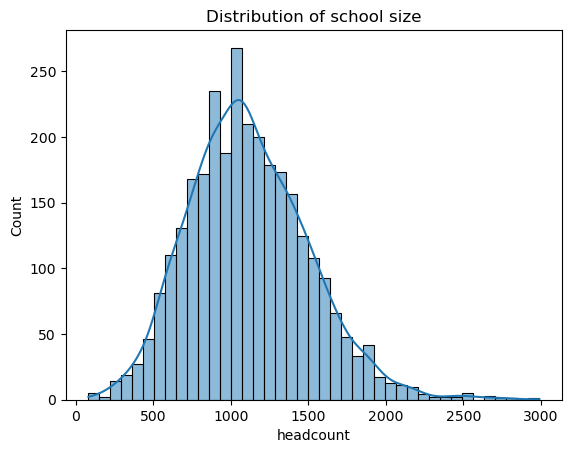

In [31]:
sns.histplot(data['headcount'], kde=True )
plt.title('Distribution of school size');

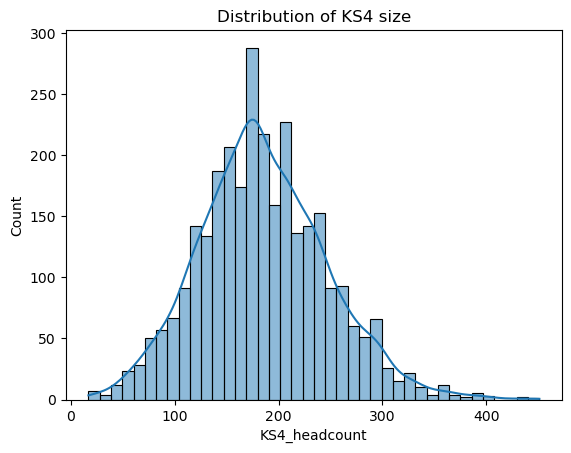

In [32]:
sns.histplot(data['KS4_headcount'], kde=True )
plt.title('Distribution of KS4 size');

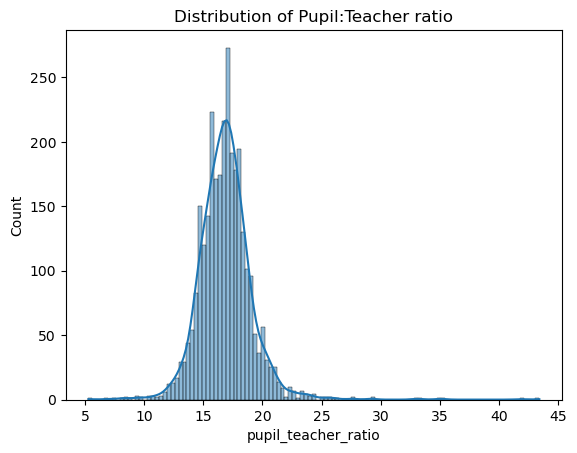

In [33]:
sns.histplot(data['pupil_teacher_ratio'], kde=True )
plt.title('Distribution of Pupil:Teacher ratio');

### Performance indicators

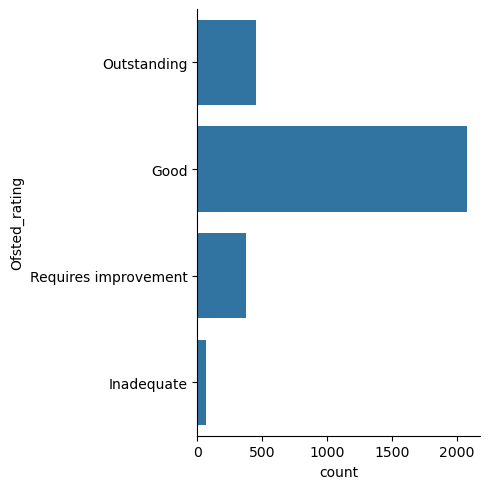

In [34]:
sns.catplot(data['Ofsted_rating'], kind='count');

In [35]:
data.groupby('Ofsted_rating').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_91320/3787143538.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Ofsted_rating').size()


Ofsted_rating
Outstanding              450
Good                    2077
Requires improvement     374
Inadequate                71
dtype: int64

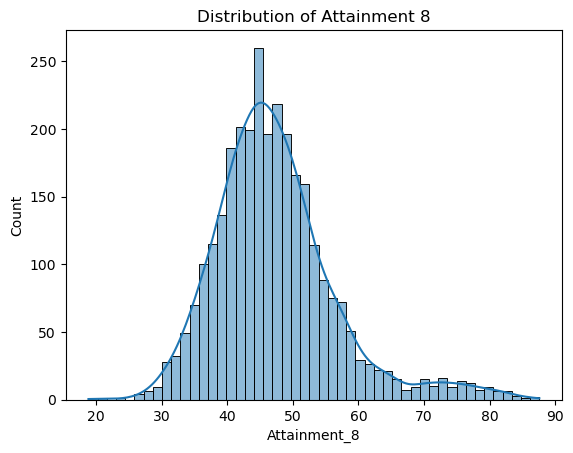

In [36]:
sns.histplot(data['Attainment_8'], kde=True )
plt.title('Distribution of Attainment 8');

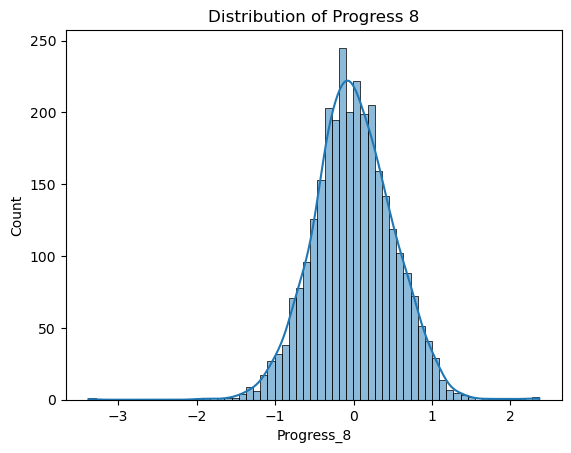

In [37]:
sns.histplot(data['Progress_8'], kde=True )
plt.title('Distribution of Progress 8');

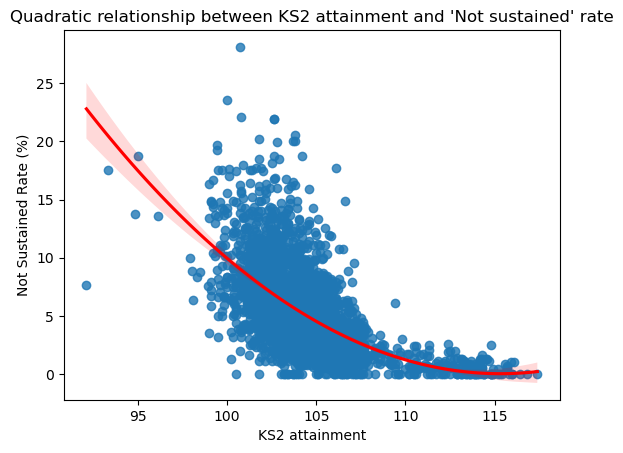

In [44]:
sns.regplot(data=data, x='KS2_history', y='not_sustained_rate',
           order=2, line_kws={"color": "red"})

plt.xlabel("KS2 attainment")  
plt.ylabel("Not Sustained Rate (%)")

plt.title("Quadratic relationship between KS2 attainment and 'Not sustained' rate");

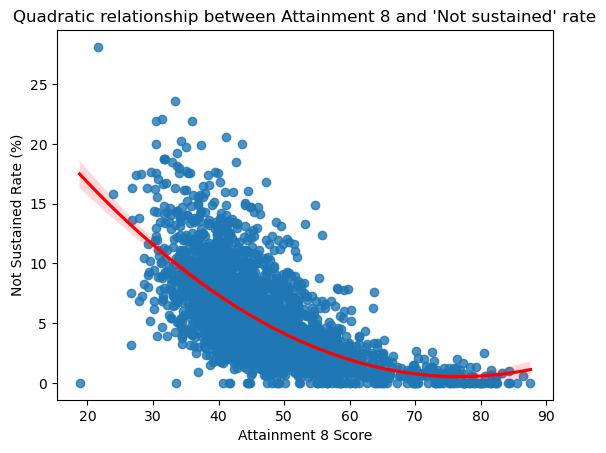

In [45]:
sns.regplot(data=data, x='Attainment_8', y='not_sustained_rate',
           order=2, line_kws={"color": "red"})

plt.xlabel("Attainment 8 Score")  
plt.ylabel("Not Sustained Rate (%)")

plt.title("Quadratic relationship between Attainment 8 and 'Not sustained' rate");

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   URN                      2972 non-null   int64   
 1   not_sustained_rate       2972 non-null   float64 
 2   total_absence            2972 non-null   float64 
 3   persistent_absence       2972 non-null   float64 
 4   urban_rural              2972 non-null   object  
 5   denomination             2972 non-null   object  
 6   FSM                      2972 non-null   float64 
 7   White_British            2972 non-null   float64 
 8   EAL                      2972 non-null   float64 
 9   perc_boys                2972 non-null   float64 
 10  region_name              2972 non-null   object  
 11  school_name              2972 non-null   object  
 12  headcount                2972 non-null   float64 
 13  perm_excl_rate           2972 non-null   float64 
 14  susp_rate    

### Other school characteristics

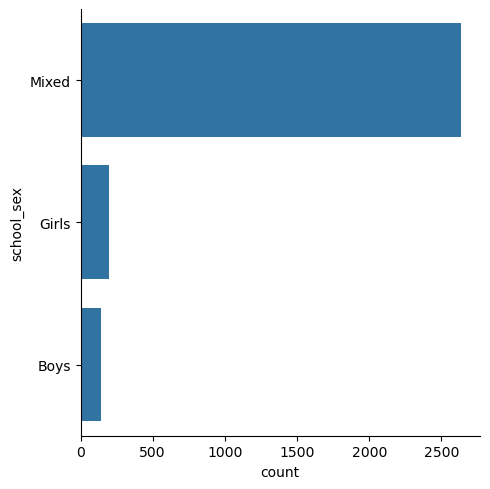

In [37]:
sns.catplot(data['school_sex'], kind='count');

In [38]:
data.groupby('single_sex_binary').size()

single_sex_binary
0    2635
1     337
dtype: int64

In [39]:
data.groupby('post16').size()

post16
0    1112
1    1860
dtype: int64

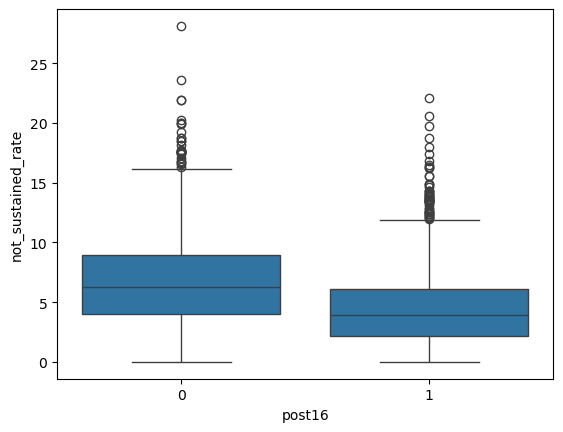

In [40]:
sns.boxplot(data=data, x='post16', y='not_sustained_rate');

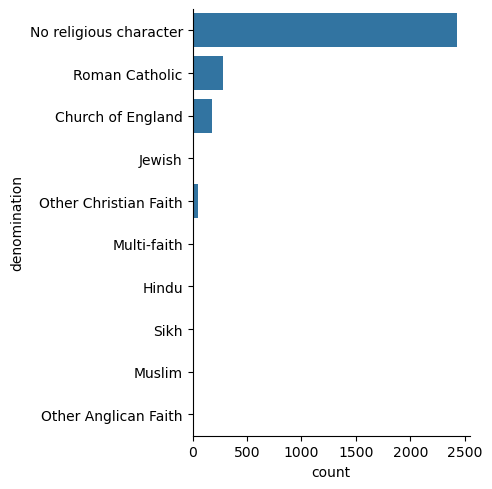

In [41]:
sns.catplot(data['denomination'], kind='count');

In [42]:
denomination_mean_neet = data.groupby('denomination')['not_sustained_rate'].mean().sort_values().index

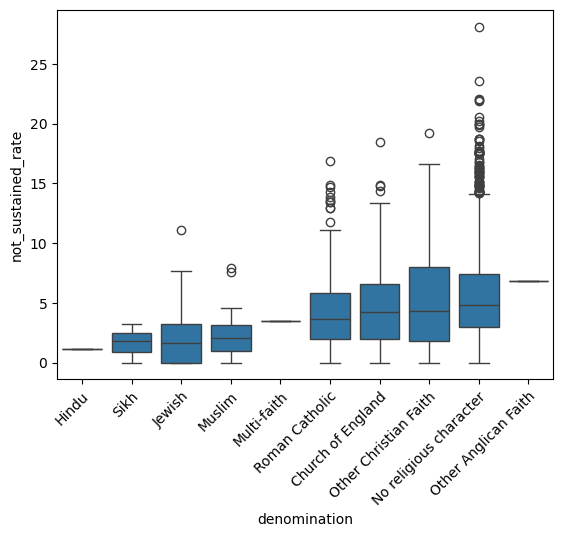

In [43]:
sns.boxplot(data=data, x='denomination', y='not_sustained_rate', order=denomination_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [44]:
data['denomination'].replace('Church of England', 'Christian', inplace=True)
data['denomination'].replace('Hindu', 'Other faith', inplace=True)
data['denomination'].replace('Jewish', 'Other faith', inplace=True)
data['denomination'].replace('Multi-faith', 'No faith', inplace=True)
data['denomination'].replace('Muslim', 'Other faith', inplace=True)
data['denomination'].replace('No religious character', 'No faith', inplace=True)
data['denomination'].replace('Other Anglican Faith', 'Christian', inplace=True)
data['denomination'].replace('Other Christian Faith', 'Christian', inplace=True)
data['denomination'].replace('Roman Catholic', 'Christian', inplace=True)
data['denomination'].replace('Sikh', 'Other faith', inplace=True)

In [45]:
data.groupby('denomination').size()

denomination
Christian       515
No faith       2425
Other faith      32
dtype: int64

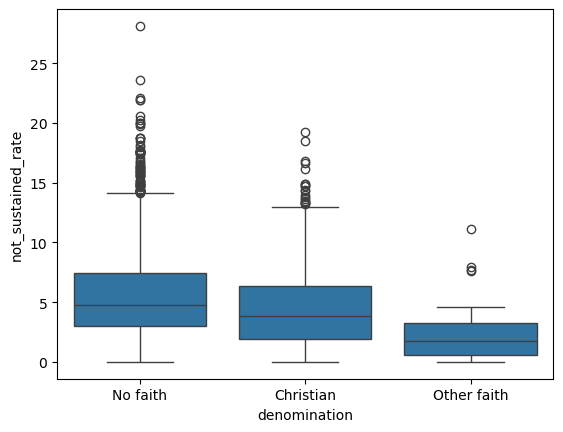

In [46]:
sns.boxplot(data=data, x='denomination', y='not_sustained_rate');

In [47]:
data['faith_binary'] = data['denomination']

In [48]:
data['faith_binary'].replace('No faith', 0, inplace=True)
data['faith_binary'].replace('Christian', 1, inplace=True)
data['faith_binary'].replace('Other faith', 1, inplace=True)

In [49]:
data.groupby('faith_binary').size()

faith_binary
0    2425
1     547
dtype: int64

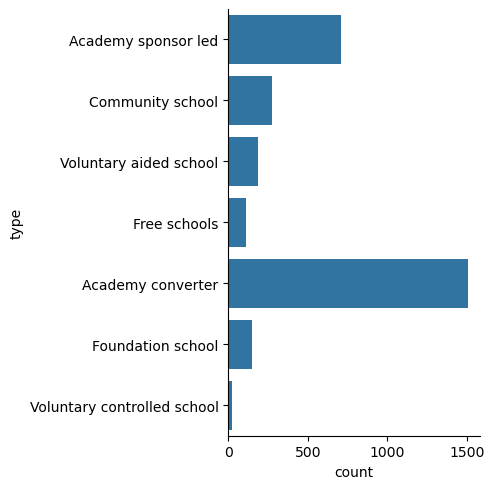

In [50]:
sns.catplot(data['type'], kind='count');

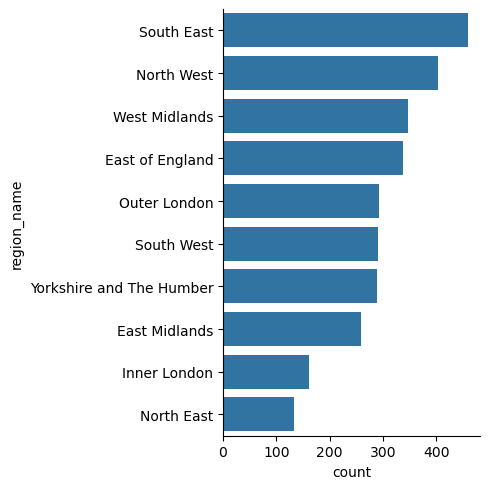

In [51]:
sns.catplot(data['region_name'], 
            kind = 'count', 
            order = data['region_name'].value_counts().index);

In [52]:
region_mean_neet = data.groupby('region_name')['not_sustained_rate'].mean().sort_values().index

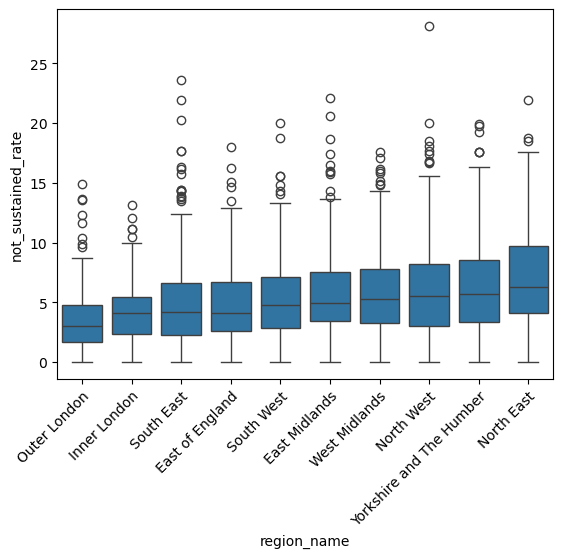

In [53]:
sns.boxplot(data=data, x='region_name', y='not_sustained_rate', order=region_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [54]:
# new column for region
data['region_new'] = data['region_name']

data['region_new'].replace('Outer London', 'London', inplace=True)
data['region_new'].replace('Inner London', 'London', inplace=True)

data['region_new'].replace('South East', 'South', inplace=True)
data['region_new'].replace('South West', 'South', inplace=True)
data['region_new'].replace('East of England', 'South', inplace=True)

data['region_new'].replace('East Midlands', 'Midlands', inplace=True)
data['region_new'].replace('West Midlands', 'Midlands', inplace=True)

data['region_new'].replace('Yorkshire and The Humber', 'North', inplace=True)
data['region_new'].replace('North West', 'North', inplace=True)
data['region_new'].replace('North East', 'North', inplace=True)

In [55]:
data.groupby('region_new').size()

region_new
London       453
Midlands     606
North        826
South       1087
dtype: int64

In [56]:
ordered_regions = data.groupby('region_new')['not_sustained_rate'].median().sort_values().index

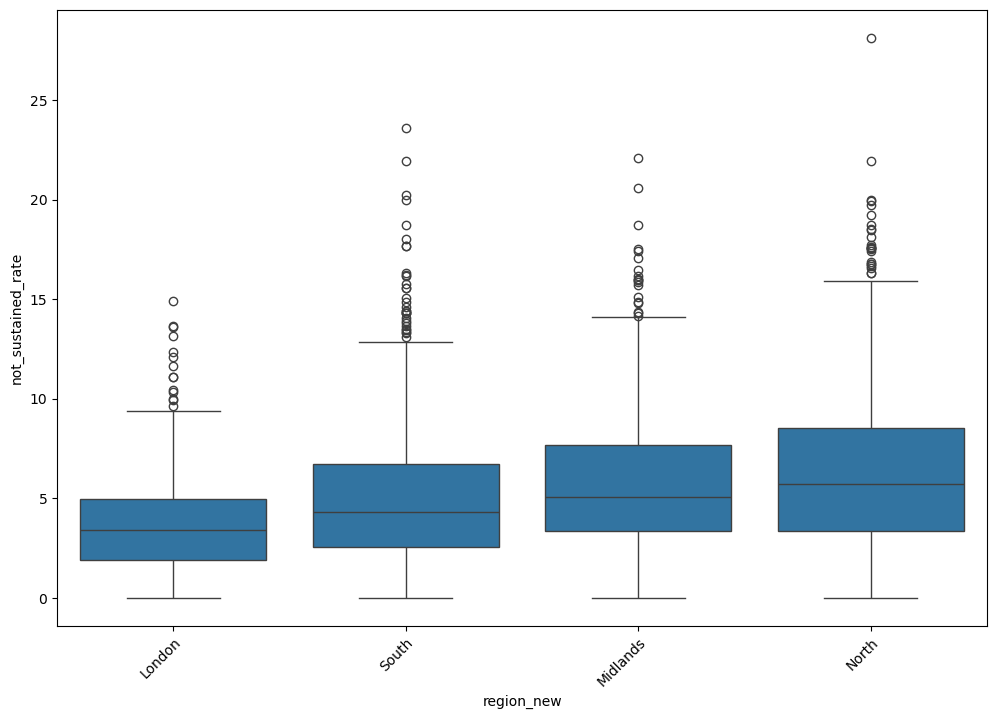

In [57]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='region_new', y='not_sustained_rate', order=ordered_regions)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

Reduced collinearity with IMD - variation in IMD across regions reduced. 

In [58]:
data.groupby('IMD').size()

IMD
1.0     228
2.0     281
3.0     315
4.0     316
5.0     288
6.0     297
7.0     304
8.0     306
9.0     336
10.0    301
dtype: int64

In [59]:
region_means = data.groupby('region_name')['IMD'].mean()
print(region_means)

region_name
East Midlands               5.907336
East of England             6.426036
Inner London                4.043478
North East                  5.022388
North West                  5.032178
Outer London                5.736301
South East                  6.764706
South West                  6.065517
West Midlands               4.985591
Yorkshire and The Humber    5.218750
Name: IMD, dtype: float64


In [60]:
new_region_means = data.groupby('region_new')['IMD'].mean()
print(new_region_means)

region_new
London      5.134658
Midlands    5.379538
North       5.095642
South       6.472861
Name: IMD, dtype: float64


In [61]:
data['urban_rural'] = data['urban_rural'].astype(str)
np.unique(data['urban_rural'])

array(['(England/Wales) Rural hamlet and isolated dwellings',
       '(England/Wales) Rural hamlet and isolated dwellings in a sparse setting',
       '(England/Wales) Rural town and fringe',
       '(England/Wales) Rural town and fringe in a sparse setting',
       '(England/Wales) Rural village',
       '(England/Wales) Rural village in a sparse setting',
       '(England/Wales) Urban city and town',
       '(England/Wales) Urban city and town in a sparse setting',
       '(England/Wales) Urban major conurbation',
       '(England/Wales) Urban minor conurbation'], dtype=object)

In [62]:
data['urban_rural'].replace('(England/Wales) Urban major conurbation', 'Urban major conurbation', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban minor conurbation', 'Urban minor conurbation', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban city and town', 'Urban city and town', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban city and town in a sparse setting', 'Urban city and town in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural town and fringe', 'Rural town and fringe', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural town and fringe in a sparse setting', 'Rural town and fringe in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural village', 'Rural village', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural village in a sparse setting', 'Rural village in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings', 'Rural hamlet and isolated dwellings', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings in a sparse setting', 'Rural hamlet and isolated dwellings in a sparse setting', inplace=True)

In [63]:
urban_rural_cats = CategoricalDtype(categories=['Urban major conurbation', 
                                                'Urban minor conurbation', 
                                                'Urban city and town', 
                                                'Urban city and town in a sparse setting', 
                                                'Rural town and fringe',
                                                'Rural town and fringe in a sparse setting',
                                                'Rural village',
                                                'Rural village in a sparse setting',
                                                'Rural hamlet and isolated dwellings',
                                                'Rural hamlet and isolated dwellings in a sparse setting'
                                               ], 
                                    ordered=True)
data['urban_rural'] = data['urban_rural'].astype(urban_rural_cats)

In [64]:
data.groupby('urban_rural').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_1772/1274345496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('urban_rural').size()


urban_rural
Urban major conurbation                                    1054
Urban minor conurbation                                     105
Urban city and town                                        1381
Urban city and town in a sparse setting                       8
Rural town and fringe                                       289
Rural town and fringe in a sparse setting                    29
Rural village                                                54
Rural village in a sparse setting                             6
Rural hamlet and isolated dwellings                          43
Rural hamlet and isolated dwellings in a sparse setting       3
dtype: int64

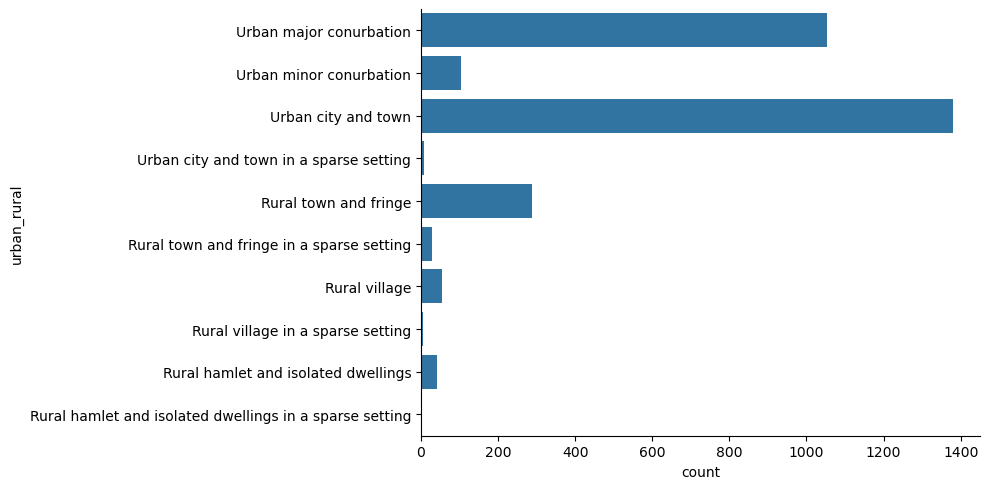

In [65]:
g = sns.catplot(data['urban_rural'], kind='count', height=5, aspect=2);

In [66]:
urban_rural_mean_neet = data.groupby('urban_rural')['not_sustained_rate'].mean().sort_values().index

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_1772/3792850642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  urban_rural_mean_neet = data.groupby('urban_rural')['not_sustained_rate'].mean().sort_values().index


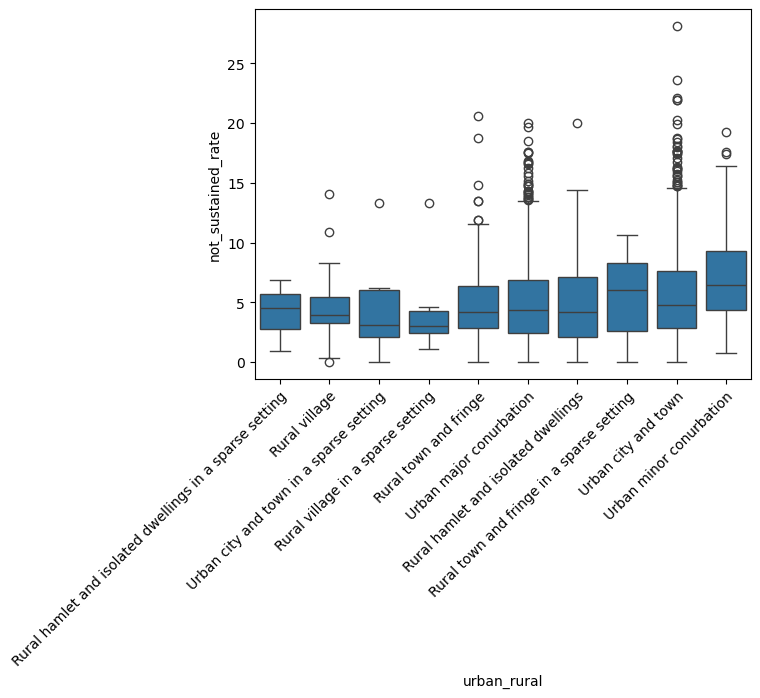

In [67]:
sns.boxplot(data=data, x='urban_rural', y='not_sustained_rate', order=urban_rural_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [68]:
# new column for binary urban status
data['urban_binary'] = data['urban_rural']

In [69]:
# replace labels with numbers
data['urban_binary'].replace('Urban major conurbation', 1, inplace=True)
data['urban_binary'].replace('Urban minor conurbation', 1, inplace=True)
data['urban_binary'].replace('Urban city and town', 1, inplace=True)
data['urban_binary'].replace('Urban city and town in a sparse setting', 1, inplace=True)
data['urban_binary'].replace('Rural town and fringe', 0, inplace=True)
data['urban_binary'].replace('Rural town and fringe in a sparse setting', 0, inplace=True)
data['urban_binary'].replace('Rural village', 0, inplace=True)
data['urban_binary'].replace('Rural village in a sparse setting', 0, inplace=True)
data['urban_binary'].replace('Rural hamlet and isolated dwellings', 0, inplace=True)
data['urban_binary'].replace('Rural hamlet and isolated dwellings in a sparse setting', 0, inplace=True)

In [70]:
data.groupby('urban_binary').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_1772/419234468.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('urban_binary').size()


urban_binary
1    2548
0     424
dtype: int64

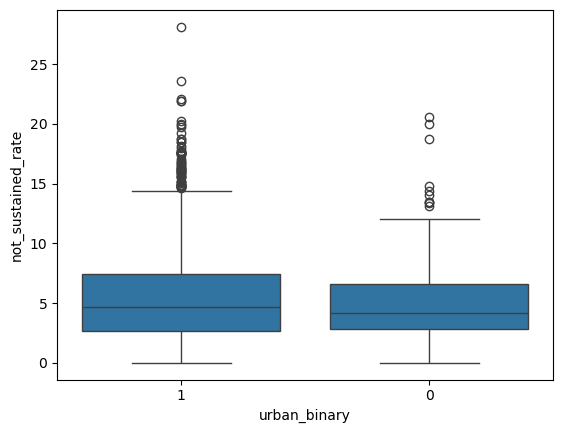

In [71]:
sns.boxplot(data=data, x='urban_binary', y='not_sustained_rate');

### Pupil characteristics

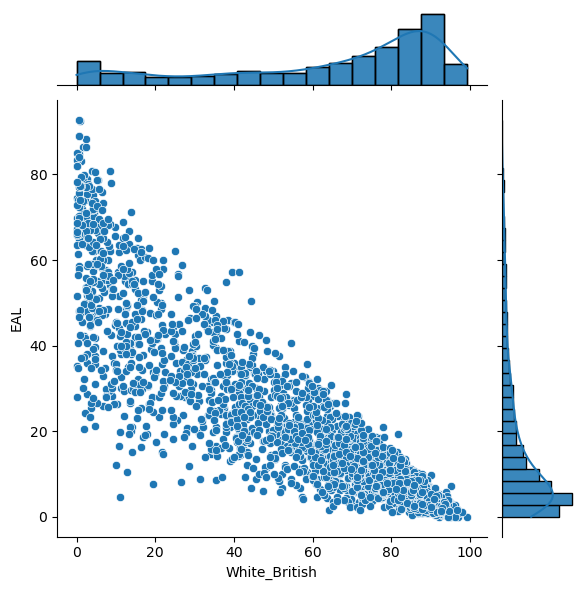

In [72]:
g = sns.jointplot(data=data, x='White_British', y='EAL')
g.plot_marginals(sns.histplot, kde=True);

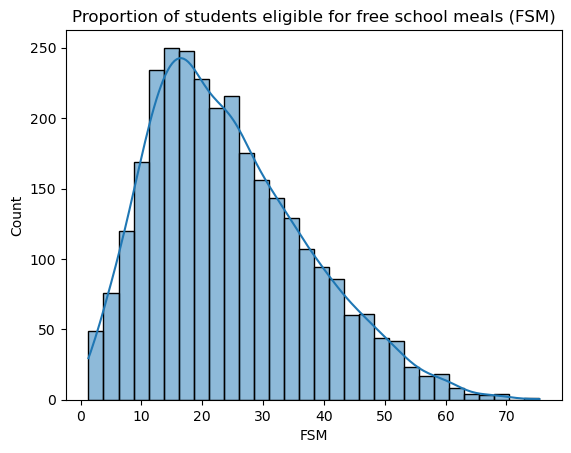

In [73]:
sns.histplot(data['FSM'], kde=True )
plt.title('Proportion of students eligible for free school meals (FSM)');

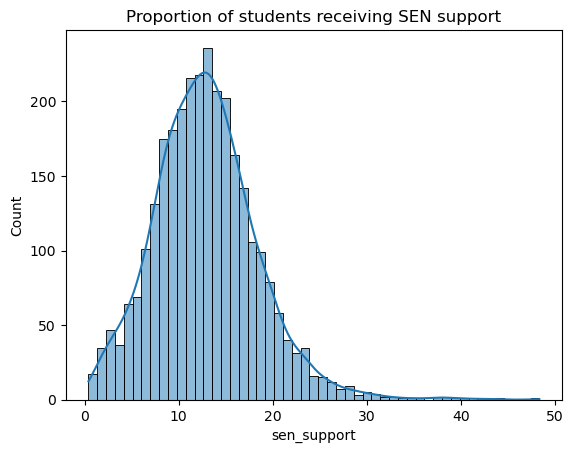

In [74]:
sns.histplot(data['sen_support'], kde=True )
plt.title('Proportion of students receiving SEN support');

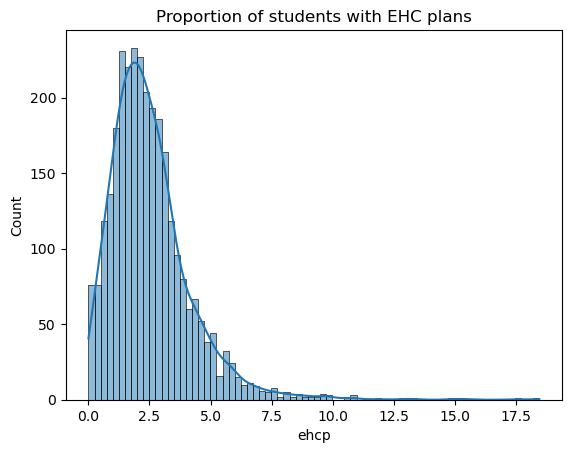

In [75]:
sns.histplot(data['ehcp'], kde=True )
plt.title('Proportion of students with EHC plans');

# Correlations

In [76]:
from copy import copy
from scipy.stats import kendalltau

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   URN                      2972 non-null   int64   
 1   not_sustained_rate       2972 non-null   float64 
 2   total_absence            2972 non-null   float64 
 3   persistent_absence       2972 non-null   float64 
 4   urban_rural              2972 non-null   category
 5   denomination             2972 non-null   object  
 6   FSM                      2972 non-null   float64 
 7   White_British            2972 non-null   float64 
 8   EAL                      2972 non-null   float64 
 9   perc_boys                2972 non-null   float64 
 10  region_name              2972 non-null   object  
 11  school_name              2972 non-null   object  
 12  headcount                2972 non-null   float64 
 13  perm_excl_rate           2972 non-null   float64 
 14  susp_rate    

In [402]:
data['Ofsted_num'] = data['Ofsted_rating']
data['Ofsted_num'].replace('Outstanding', 4, inplace=True)
data['Ofsted_num'].replace('Good', 3, inplace=True)
data['Ofsted_num'].replace('Requires improvement', 2, inplace=True)
data['Ofsted_num'].replace('Inadequate', 1, inplace=True)

In [403]:
vars_for_corr = data[['not_sustained_rate', 
                      'absence_rate_non_excl', 'persistent_absence', 
                      'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 
                      'FSM', 'White_British', 'EAL', 'perc_boys', 'sen_support', 'ehcp', 
                      'headcount', 'KS4_headcount', 
                      'pupil_teacher_ratio', 'assistant_teacher_ratio', 
                      'Ofsted_num',
                      'KS2_history', 'KS4_pass_rate', 'Attainment_8', 'Progress_8', 
                      'selective', 'post16',
                      'IMD', 'urban_binary', 'single_sex_binary', 'faith_binary']]

In [404]:
vars_for_corr.columns

Index(['not_sustained_rate', 'absence_rate_non_excl', 'persistent_absence',
       'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 'FSM',
       'White_British', 'EAL', 'perc_boys', 'sen_support', 'ehcp', 'headcount',
       'KS4_headcount', 'pupil_teacher_ratio', 'assistant_teacher_ratio',
       'Ofsted_num', 'KS2_history', 'KS4_pass_rate', 'Attainment_8',
       'Progress_8', 'selective', 'post16', 'IMD', 'urban_binary',
       'single_sex_binary', 'faith_binary'],
      dtype='object')

In [405]:
corr_names = {
    'not_sustained_rate': 'Not sustained %', 
    'absence_rate_non_excl': 'Absence %', 
    'persistent_absence': 'Persistent absence %',
    'perm_excl_rate': 'Permanent exclusion %', 
    'susp_rate': 'Suspension %', 
    'one_plus_susp_rate': 'One-plus suspension %', 
    'FSM': 'FSM %',
    'White_British': 'White British %', 
    'EAL': 'EAL %', 
    'perc_boys': 'Boys %', 
    'sen_support': 'SEN support %', 
    'ehcp': 'EHCP %', 
    'headcount': 'School headcount',
    'KS4_headcount': 'KS4 headcount', 
    'pupil_teacher_ratio': 'Pupil:Teacher ratio', 
    'assistant_teacher_ratio': 'Assistant:Teacher ratio',
    'Ofsted_num': 'Ofsted rating',
    'KS2_history': 'KS2 history', 
    'KS4_pass_rate': 'KS4 pass %', 
    'Attainment_8': 'A8', 
    'Progress_8': 'P8',
    'selective': 'Selective schools', 
    'post16': 'Post-16', 
    'IMD': 'IMD of LSOA', 
    'urban_binary': 'Urban schools', 
    'single_sex_binary': 'Single sex schools',
    'faith_binary': 'Faith schools'
}

In [406]:
vars_for_corr = vars_for_corr.rename(columns=corr_names)

In [407]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

##### Positive correlations

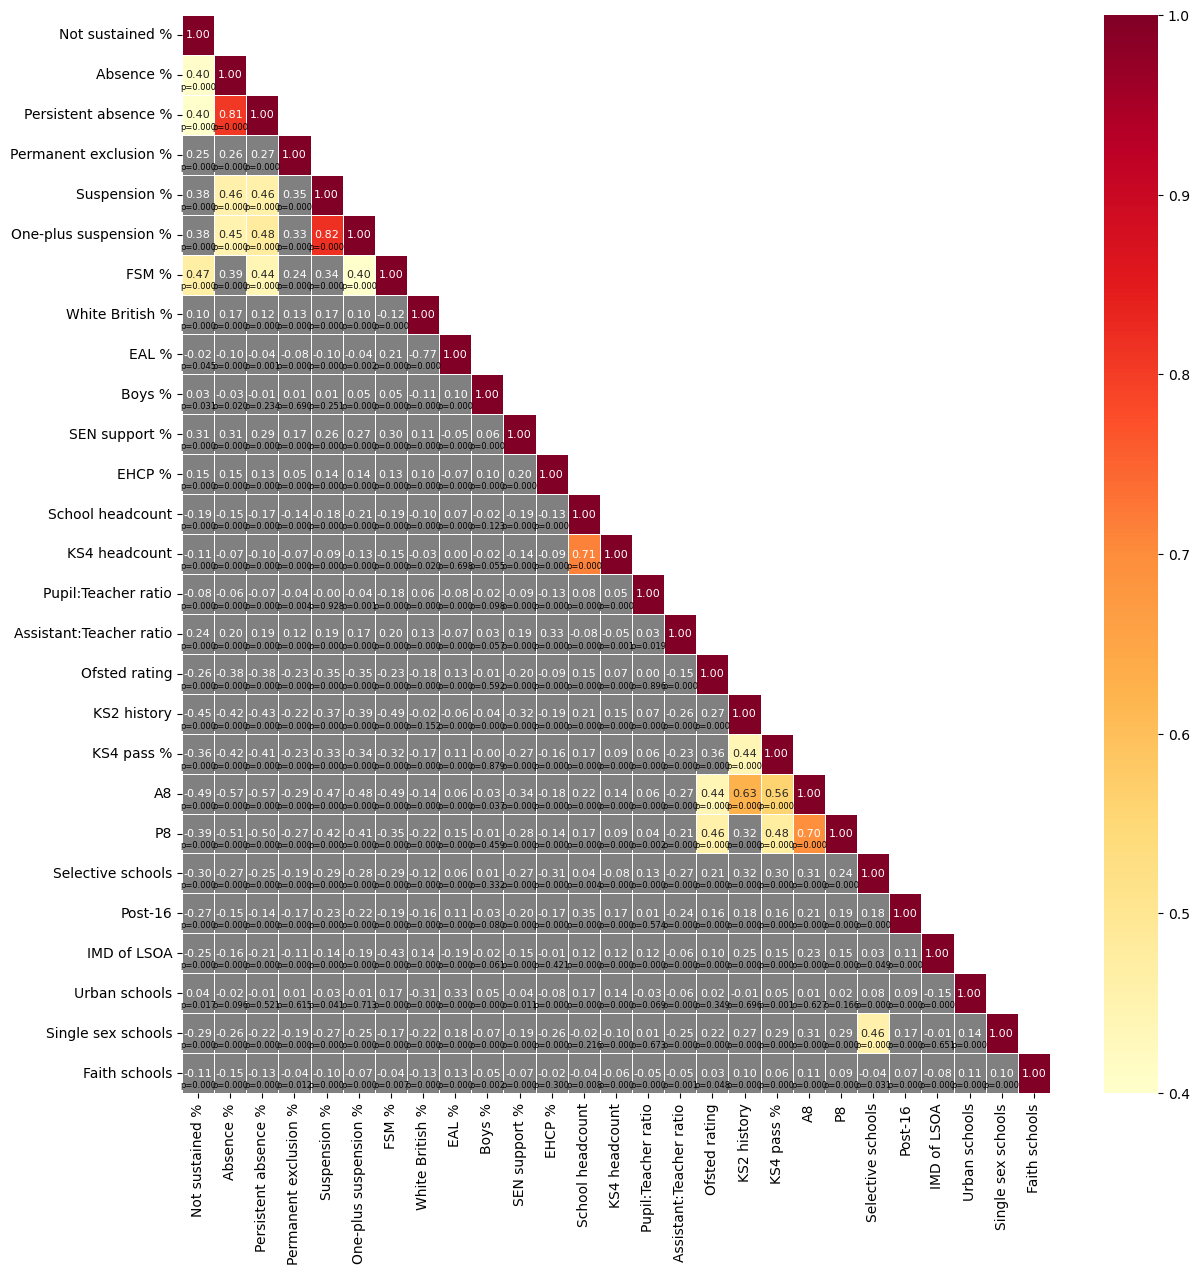

In [408]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


## Negative correlations

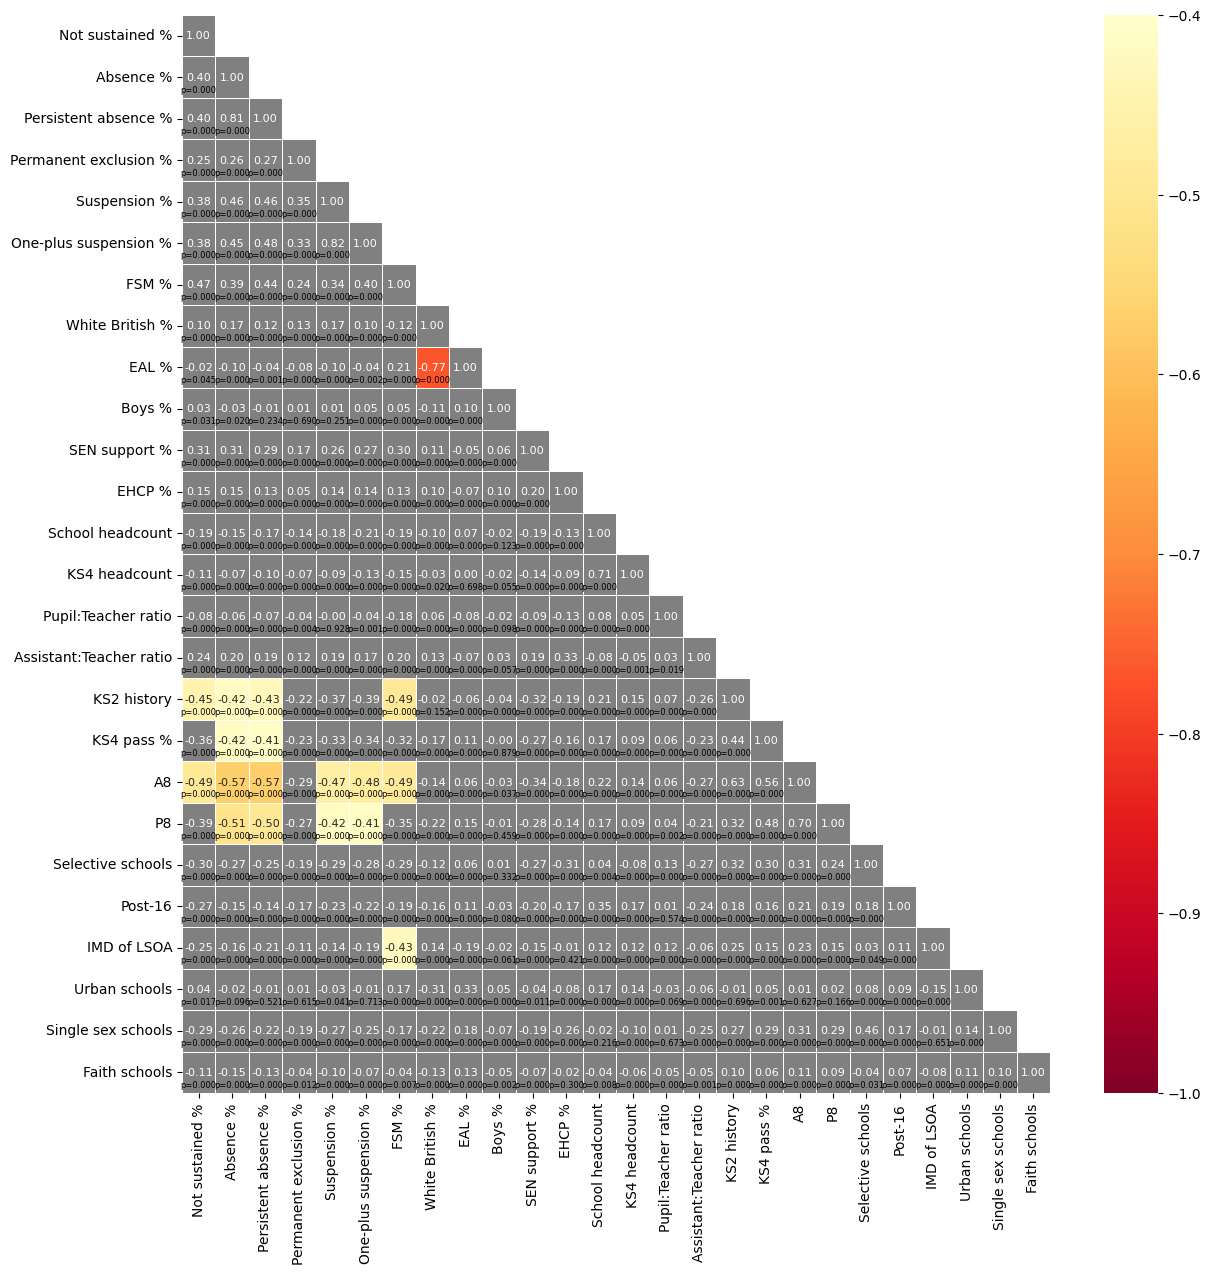

In [84]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

## Explore correlations

# Regression

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   URN                      2972 non-null   int64   
 1   not_sustained_rate       2972 non-null   float64 
 2   total_absence            2972 non-null   float64 
 3   persistent_absence       2972 non-null   float64 
 4   urban_rural              2972 non-null   category
 5   denomination             2972 non-null   category
 6   FSM                      2972 non-null   float64 
 7   White_British            2972 non-null   float64 
 8   EAL                      2972 non-null   float64 
 9   perc_boys                2972 non-null   float64 
 10  region_name              2972 non-null   object  
 11  school_name              2972 non-null   object  
 12  headcount                2972 non-null   float64 
 13  perm_excl_rate           2972 non-null   float64 
 14  susp_rate    

In [208]:
# convert to category 
data['denomination'] = pd.Categorical(data['denomination'])
data['school_sex'] = pd.Categorical(data['school_sex'])
data['type'] = pd.Categorical(data['type'])
data['region_new'] = pd.Categorical(data['region_new'])

# convert to int
data['urban_binary'] = data['urban_binary'].astype(int)

In [209]:
data_transformed = pd.get_dummies(data, 
                                  columns=['type', 
                                           'denomination', 
                                           #'school_sex', 
                                           'region_new', 
                                           #'Ofsted_rating'
                                          ], 
                                 drop_first=False)
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   URN                               2972 non-null   int64   
 1   not_sustained_rate                2972 non-null   float64 
 2   total_absence                     2972 non-null   float64 
 3   persistent_absence                2972 non-null   float64 
 4   urban_rural                       2972 non-null   category
 5   FSM                               2972 non-null   float64 
 6   White_British                     2972 non-null   float64 
 7   EAL                               2972 non-null   float64 
 8   perc_boys                         2972 non-null   float64 
 9   region_name                       2972 non-null   object  
 10  school_name                       2972 non-null   object  
 11  headcount                         2972 non-null   float64 
 1

In [4]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

from sklearn.preprocessing import PowerTransformer, OrdinalEncoder

In [211]:
ord_transformer = OrdinalEncoder()

In [212]:
data_transformed[['Ofsted_rating']] = ord_transformer.fit_transform(data_transformed[['Ofsted_rating']])

In [213]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   URN                               2972 non-null   int64   
 1   not_sustained_rate                2972 non-null   float64 
 2   total_absence                     2972 non-null   float64 
 3   persistent_absence                2972 non-null   float64 
 4   urban_rural                       2972 non-null   category
 5   FSM                               2972 non-null   float64 
 6   White_British                     2972 non-null   float64 
 7   EAL                               2972 non-null   float64 
 8   perc_boys                         2972 non-null   float64 
 9   region_name                       2972 non-null   object  
 10  school_name                       2972 non-null   object  
 11  headcount                         2972 non-null   float64 
 1

In [214]:
data_transformed = data_transformed.astype({col: 'int' for col in data_transformed.select_dtypes(include='bool').columns})

In [215]:
data_transformed.head()

URN  not_sustained_rate  total_absence  persistent_absence  \
1  137181            5.172414           11.1                38.1   
3  100050            2.824859            7.9                24.8   
4  100051            5.464481           11.4                42.9   
5  100052            1.932367            8.2                24.0   
6  100053            4.469274            8.1                24.7   

               urban_rural   FSM  White_British   EAL  perc_boys  \
1  Urban major conurbation  41.2           10.8  51.7  56.874466   
3  Urban major conurbation  35.6           38.8  34.1   4.963971   
4  Urban major conurbation  61.8            3.9  67.3  56.163114   
5  Urban major conurbation  41.8           11.4  38.1  51.630023   
6  Urban major conurbation  34.3           46.3  23.6  65.778160   

    region_name             school_name  headcount  perm_excl_rate  susp_rate  \
1  Inner London         The UCL Academy     1171.0         0.34159   14.51751   
3  Inner London  Parliament Hill School     1249.0         0.08006    9.12730   
4  Inner London      Regent High School     1079.0         0.09268    5.37535   
5  Inner London        Hampstead School     1319.0         0.07582    3.26005   
6  Inner London  Acland Burghley School     1163.0         0.17197    8.25451   

   one_plus_susp_rate  KS4_headcount  KS2_history  Attainment_8  Progress_8  \
1             8.45431            168        105.1          47.4       -0.18   
3             5.04404            174        107.1          59.1        0.61   
4             4.26321            173        103.5          43.8       -0.06   
5             2.65353            197        103.2          44.6       -0.04   
6             4.47120            178        106.0          50.3       -0.17   

   selective  KS4_pass_rate POSTCODE  post16 school_sex  Ofsted_rating  \
1          0             27  NW3 3AQ       1      Mixed            3.0   
3          0             40  NW5 1RL       1      Girls            0.0   
4          0             21  NW1 1RX       1      Mixed            0.0   
5          0             10  NW2 3RT       1      Mixed            0.0   
6          0             34  NW5 1UJ       1      Mixed            0.0   

   sen_support      ehcp     LSOA11  IMD  pupil_teacher_ratio  \
1    10.247652  3.245090  E01000963  8.0                 13.0   
3    13.370697  1.281025  E01000912  4.0                 14.7   
4    17.886932  3.614458  E01000952  2.0                 11.9   
5     9.628506  2.880970  E01000871  7.0                 14.9   
6    11.951849  7.480653  E01000928  5.0                 12.2   

   assistant_teacher_ratio  absence_rate_non_excl  single_sex_binary  \
1                      0.2              10.803701                  0   
3                      0.1               7.769210                  1   
4                      0.2              11.246731                  0   
5                      0.2               8.103096                  0   
6                      0.3               7.963311                  0   

   faith_binary  urban_binary  type_Academy converter  \
1             0             1                       0   
3             0             1                       0   
4             0             1                       0   
5             0             1                       0   
6             0             1                       0   

   type_Academy sponsor led  type_Community school  type_Foundation school  \
1                         1                      0                       0   
3                         0                      1                       0   
4                         0                      1                       0   
5                         0                      1                       0   
6                         0                      1                       0   

   type_Free schools  type_Voluntary aided school  \
1                  0                            0   
3                  0                   

### Specify variables

In [216]:
predictors = data_transformed[[
'headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'faith_binary',
'single_sex_binary',
#'type_Academy converter',
'type_Academy sponsor led',
'type_Community school',
'type_Foundation school',
'type_Free schools',
'type_Voluntary aided school',
'type_Voluntary controlled school'
]]

In [217]:
controls = data_transformed[[
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

In [218]:
predictors_controls = data_transformed[[
'headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'faith_binary',
'single_sex_binary',
#'type_Academy converter',
'type_Academy sponsor led',
'type_Community school',
'type_Foundation school',
'type_Free schools',
'type_Voluntary aided school',
'type_Voluntary controlled school',

# controls
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

### Run model - Predictors only

#### predictors - individual effects

In [219]:
predictors_results = {}

for p in predictors:
    x = data_transformed[p]
    y = data_transformed['not_sustained_rate']

    model = sm.OLS(y, x).fit()

    predictors_results[p] = model.summary()
    

In [220]:
predictors_results

{'headcount': <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.528
 Model:                            OLS   Adj. R-squared (uncentered):              0.528
 Method:                 Least Squares   F-statistic:                              3321.
 Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
 Time:                        10:14:29   Log-Likelihood:                         -8661.3
 No. Observations:                2972   AIC:                                  1.732e+04
 Df Residuals:                    2971   BIC:                                  1.733e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust                                                  
                  coef    std err          t   

In [221]:
# extract t stat for each predictor 
t_statistics = {}

for predictor, result in predictors_results.items():
    t_statistics[predictor] = result.tables[1].data[1][3] 

t_statistics

{'headcount': '   57.625',
 'pupil_teacher_ratio': '   76.058',
 'assistant_teacher_ratio': '   73.178',
 'susp_rate': '   58.408',
 'Progress_8': '  -17.018',
 'post16': '   35.063',
 'Ofsted_rating': '   26.236',
 'faith_binary': '   16.758',
 'single_sex_binary': '    6.366',
 'type_Academy sponsor led': '   41.872',
 'type_Community school': '   13.483',
 'type_Foundation school': '   11.451',
 'type_Free schools': '    8.698',
 'type_Voluntary aided school': '    8.956',
 'type_Voluntary controlled school': '    2.915'}

#### all predictors

In [222]:
x = predictors

In [223]:
y = data_transformed['not_sustained_rate']

In [224]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              825.6
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:14:36   Log-Likelihood:                         -7329.8
No. Observations:                2972   AIC:                                  1.469e+04
Df Residuals:                    2957   BIC:                                  1.478e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
headcount                        -2.702e-05      0.000     -0.174      0.862      -0.000       0.000
pupil_teacher_ratio                  0.2080      0.012     16.650      0.000       0.184       0.232
assistant_teacher_ratio              3.6672      0.464      7.896      0.000       2.757       4.578
susp_rate                            0.0332      0.003     13.127      0.000       0.028       0.038
Progress_8                          -2.0172      0.127    -15.833      0.000      -2.267      -1.767
post16                              -0.7340      0.125     -5.867      0.000      -0.979      -0.489
Ofsted_rating                        0.0047      0.047      0.099      0.921      -0.088       0.097
faith_binary                        -0.0062      0.160     -0.039      0.969      -0.320       0.307
single_sex_binary                   -0.6330      0.185     -3.419      0.001      -0.996      -0.270
type_Academy sponsor led             2.4293      0.138     17.555      0.000       2.158       2.701
type_Community school                0.5893      0.191      3.092      0.002       0.216       0.963
type_Foundation school               1.2039      0.246      4.891      0.000       0.721       1.687
type_Free schools                    1.1026      0.284      3.889      0.000       0.547       1.659
type_Voluntary aided school          0.5095      0.252      2.020      0.043       0.015       1.004
type_Voluntary controlled school    -0.4183      0.632     -0.662      0.508      -1.658       0.821
==============================================================================
Omnibus:                      360.013   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.407
Skew:                           0.767   Prob(JB):                    2.98e-153
Kurtosis:                       4.822   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### forward selection: corr coef

In [225]:
x = predictors[['susp_rate',
'Progress_8']]

In [226]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.537
Model:                            OLS   Adj. R-squared (uncentered):              0.536
Method:                 Least Squares   F-statistic:                              1720.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:14:40   Log-Likelihood:                         -8633.2
No. Observations:                2972   AIC:                                  1.727e+04
Df Residuals:                    2970   BIC:                                  1.728e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
susp_rate      0.1459      0.003     53.574      0.000       0.141       0.151
Progress_8    -0.6306      0.171     -3.685      0.000      -0.966      -0.295
==============================================================================
Omnibus:                      908.024   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15351.209
Skew:                          -0.997   Prob(JB):                         0.00
Kurtosis:                      13.954   Cond. No.                         67.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
x = predictors[['susp_rate',
'Progress_8', 'single_sex_binary']]

In [228]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.544
Model:                            OLS   Adj. R-squared (uncentered):              0.544
Method:                 Least Squares   F-statistic:                              1182.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:14:42   Log-Likelihood:                         -8608.2
No. Observations:                2972   AIC:                                  1.722e+04
Df Residuals:                    2969   BIC:                                  1.724e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
susp_rate             0.1416      0.003     51.187      0.000       0.136       0.147
Progress_8           -1.1431      0.184     -6.198      0.000      -1.505      -0.781
single_sex_binary     1.8485      0.260      7.105      0.000       1.338       2.359
==============================================================================
Omnibus:                      784.601   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11010.012
Skew:                          -0.857   Prob(JB):                         0.00
Kurtosis:                      12.272   Cond. No.                         109.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
x = predictors[['susp_rate',
'Progress_8', 'single_sex_binary', 'post16']]

In [230]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.626
Model:                            OLS   Adj. R-squared (uncentered):              0.625
Method:                 Least Squares   F-statistic:                              1239.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:14:43   Log-Likelihood:                         -8316.7
No. Observations:                2972   AIC:                                  1.664e+04
Df Residuals:                    2968   BIC:                                  1.667e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
susp_rate             0.1093      0.003     38.816      0.000       0.104       0.115
Progress_8           -2.0718      0.171    -12.103      0.000      -2.407      -1.736
single_sex_binary     0.1288      0.245      0.525      0.600      -0.353       0.610
post16                2.8175      0.111     25.361      0.000       2.600       3.035
==============================================================================
Omnibus:                      253.561   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1419.316
Skew:                           0.173   Prob(JB):                    6.30e-309
Kurtosis:                       6.368   Cond. No.                         112.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio']]

In [232]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.744
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              2158.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:14:43   Log-Likelihood:                         -7750.4
No. Observations:                2972   AIC:                                  1.551e+04
Df Residuals:                    2968   BIC:                                  1.553e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
susp_rate                   0.0630      0.003     23.895      0.000       0.058       0.068
Progress_8                 -1.8039      0.135    -13.386      0.000      -2.068      -1.540
post16                      0.8785      0.103      8.547      0.000       0.677       1.080
assistant_teacher_ratio    13.0312      0.351     37.109      0.000      12.343      13.720
==============================================================================
Omnibus:                      287.830   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.226
Skew:                           0.561   Prob(JB):                    1.80e-156
Kurtosis:                       5.129   Cond. No.                         187.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'headcount']]

In [234]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.760
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              1882.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:14:45   Log-Likelihood:                         -7653.8
No. Observations:                2972   AIC:                                  1.532e+04
Df Residuals:                    2967   BIC:                                  1.535e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
susp_rate                   0.0573      0.003     22.179      0.000       0.052       0.062
Progress_8                 -2.1930      0.133    -16.445      0.000      -2.454      -1.932
post16                     -0.3992      0.135     -2.968      0.003      -0.663      -0.135
assistant_teacher_ratio     9.2467      0.433     21.357      0.000       8.398      10.096
headcount                   0.0018      0.000     14.117      0.000       0.002       0.002
==============================================================================
Omnibus:                      368.794   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              780.227
Skew:                           0.756   Prob(JB):                    3.77e-170
Kurtosis:                       5.004   Cond. No.                     8.77e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [235]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'headcount']]

In [236]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.760
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              1882.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:14:46   Log-Likelihood:                         -7653.8
No. Observations:                2972   AIC:                                  1.532e+04
Df Residuals:                    2967   BIC:                                  1.535e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
susp_rate                   0.0573      0.003     22.179      0.000       0.052       0.062
Progress_8                 -2.1930      0.133    -16.445      0.000      -2.454      -1.932
post16                     -0.3992      0.135     -2.968      0.003      -0.663      -0.135
assistant_teacher_ratio     9.2467      0.433     21.357      0.000       8.398      10.096
headcount                   0.0018      0.000     14.117      0.000       0.002       0.002
==============================================================================
Omnibus:                      368.794   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              780.227
Skew:                           0.756   Prob(JB):                    3.77e-170
Kurtosis:                       5.004   Cond. No.                     8.77e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [237]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'headcount', 'pupil_teacher_ratio']]

In [238]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              1806.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:14:48   Log-Likelihood:                         -7491.3
No. Observations:                2972   AIC:                                  1.499e+04
Df Residuals:                    2966   BIC:                                  1.503e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
susp_rate                   0.0427      0.003     16.611      0.000       0.038       0.048
Progress_8                 -2.3652      0.127    -18.679      0.000      -2.613      -2.117
post16                     -0.7510      0.129     -5.832      0.000      -1.004      -0.499
assistant_teacher_ratio     4.8527      0.474     10.243      0.000       3.924       5.782
headcount                  -0.0001      0.000     -0.820      0.412      -0.000       0.000
pupil_teacher_ratio         0.2285      0.012     18.512      0.000       0.204       0.253
==============================================================================
Omnibus:                      400.294   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.862
Skew:                           0.830   Prob(JB):                    4.58e-175
Kurtosis:                       4.931   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [239]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'pupil_teacher_ratio']]

In [240]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              2167.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:14:49   Log-Likelihood:                         -7491.7
No. Observations:                2972   AIC:                                  1.499e+04
Df Residuals:                    2967   BIC:                                  1.502e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
susp_rate                   0.0429      0.003     16.750      0.000       0.038       0.048
Progress_8                 -2.3764      0.126    -18.879      0.000      -2.623      -2.130
post16                     -0.7940      0.118     -6.751      0.000      -1.025      -0.563
assistant_teacher_ratio     4.8224      0.472     10.211      0.000       3.896       5.748
pupil_teacher_ratio         0.2219      0.009     23.755      0.000       0.204       0.240
==============================================================================
Omnibus:                      406.016   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              815.625
Skew:                           0.839   Prob(JB):                    7.75e-178
Kurtosis:                       4.941   Cond. No.                         290.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'pupil_teacher_ratio',
               #'type_Academy converter',
'type_Academy sponsor led',
'type_Community school',
'type_Foundation school',
'type_Free schools',
'type_Voluntary aided school',
'type_Voluntary controlled school']]

In [242]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.806
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              1122.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:14:52   Log-Likelihood:                         -7335.8
No. Observations:                2972   AIC:                                  1.469e+04
Df Residuals:                    2961   BIC:                                  1.476e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
susp_rate                            0.0332      0.003     13.224      0.000       0.028       0.038
Progress_8                          -2.1382      0.121    -17.696      0.000      -2.375      -1.901
post16                              -0.7757      0.112     -6.923      0.000      -0.995      -0.556
assistant_teacher_ratio              3.8815      0.460      8.443      0.000       2.980       4.783
pupil_teacher_ratio                  0.2008      0.009     22.170      0.000       0.183       0.219
type_Academy sponsor led             2.4547      0.138     17.779      0.000       2.184       2.725
type_Community school                0.5704      0.189      3.018      0.003       0.200       0.941
type_Foundation school               1.1943      0.246      4.861      0.000       0.713       1.676
type_Free schools                    1.1334      0.278      4.076      0.000       0.588       1.679
type_Voluntary aided school          0.4471      0.219      2.042      0.041       0.018       0.876
type_Voluntary controlled school    -0.4616      0.631     -0.731      0.465      -1.700       0.776
==============================================================================
Omnibus:                      350.299   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              677.924
Skew:                           0.752   Prob(JB):                    6.18e-148
Kurtosis:                       4.792   Cond. No.                         410.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [244]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [245]:
vif_values

predictor       VIF
10  type_Voluntary controlled school  1.022831
8                  type_Free schools  1.076771
9        type_Voluntary aided school  1.112678
7             type_Foundation school  1.120807
6              type_Community school  1.199982
1                         Progress_8  1.354455
5           type_Academy sponsor led  1.657943
0                          susp_rate  2.314476
2                             post16  2.853182
3            assistant_teacher_ratio  5.197548
4                pupil_teacher_ratio  8.656963

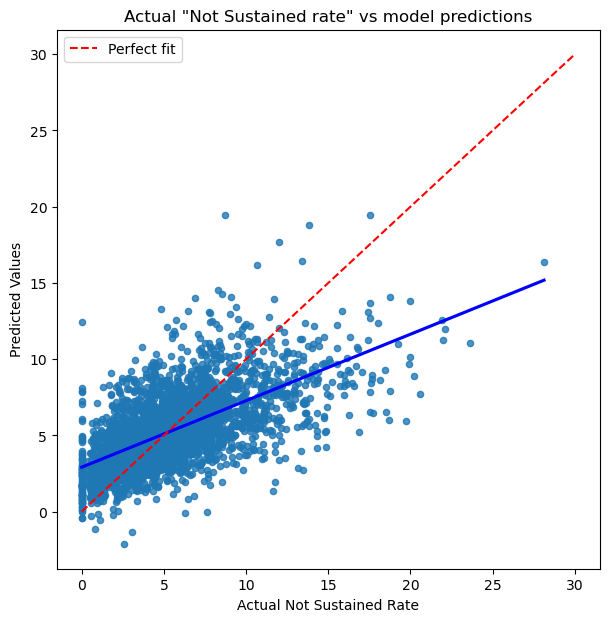

In [246]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=data_transformed['not_sustained_rate'], 
            y=model.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            ci=None
           )

plt.plot([0, 30], 
         [0, 30], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Actual "Not Sustained rate" vs model predictions')
plt.xlabel('Actual Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

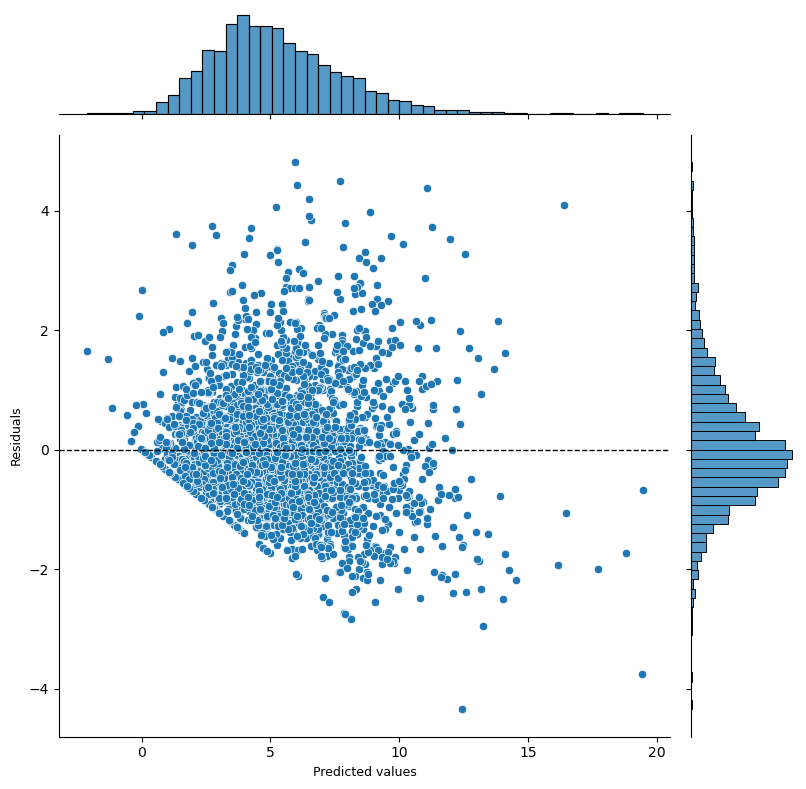

In [247]:
# create jointplot
g = sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Predicted values', 'Residuals', fontsize=9);

In [248]:
best_predictors = predictors[[
    'susp_rate',
    'Progress_8', 
    'post16', 
    'assistant_teacher_ratio', 
    'pupil_teacher_ratio'
]]

#### forward selection: adj. R-squared

In [449]:
x = predictors[[
    'assistant_teacher_ratio', 
    'pupil_teacher_ratio'
]]

In [450]:
y = data_transformed['not_sustained_rate']

In [451]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.693
Model:                            OLS   Adj. R-squared (uncentered):              0.693
Method:                 Least Squares   F-statistic:                              3360.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        16:18:36   Log-Likelihood:                         -8019.1
No. Observations:                2972   AIC:                                  1.604e+04
Df Residuals:                    2970   BIC:                                  1.605e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
assistant_teacher_ratio     9.5634      0.536     17.827      0.000       8.512      10.615
pupil_teacher_ratio         0.1808      0.008     22.079      0.000       0.165       0.197
==============================================================================
Omnibus:                      580.539   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1195.670
Skew:                           1.145   Prob(JB):                    2.31e-260
Kurtosis:                       5.099   Cond. No.                         139.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [452]:
model.aic

16042.216999032735

In [453]:
x = predictors[[
    'assistant_teacher_ratio', 
    'pupil_teacher_ratio',
    'susp_rate'
]]

In [454]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              3019.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        16:18:50   Log-Likelihood:                         -7697.5
No. Observations:                2972   AIC:                                  1.540e+04
Df Residuals:                    2969   BIC:                                  1.542e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
assistant_teacher_ratio     7.1437      0.490     14.581      0.000       6.183       8.104
pupil_teacher_ratio         0.1343      0.008     17.778      0.000       0.119       0.149
susp_rate                   0.0662      0.002     26.783      0.000       0.061       0.071
==============================================================================
Omnibus:                      517.743   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1145.874
Skew:                           1.001   Prob(JB):                    1.50e-249
Kurtosis:                       5.290   Cond. No.                         281.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [455]:
model.aic

15401.077298145845

In [456]:
x = predictors[[
    'assistant_teacher_ratio', 
    'pupil_teacher_ratio',
    'susp_rate',
    'headcount'
]]

In [457]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              2301.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        16:19:14   Log-Likelihood:                         -7679.4
No. Observations:                2972   AIC:                                  1.537e+04
Df Residuals:                    2968   BIC:                                  1.539e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
assistant_teacher_ratio     7.0769      0.487     14.527      0.000       6.122       8.032
pupil_teacher_ratio         0.1980      0.013     15.288      0.000       0.173       0.223
susp_rate                   0.0631      0.003     25.186      0.000       0.058       0.068
headcount                  -0.0009      0.000     -6.041      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      473.024   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1013.974
Skew:                           0.934   Prob(JB):                    6.58e-221
Kurtosis:                       5.167   Cond. No.                     9.77e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [458]:
model.aic

15366.751833127973

In [459]:
x = predictors[[
    'assistant_teacher_ratio', 
    'pupil_teacher_ratio',
    'susp_rate',
    'post16'
]]

In [460]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              2340.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        16:20:01   Log-Likelihood:                         -7660.3
No. Observations:                2972   AIC:                                  1.533e+04
Df Residuals:                    2968   BIC:                                  1.535e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
assistant_teacher_ratio     6.3580      0.492     12.915      0.000       5.393       7.323
pupil_teacher_ratio         0.1881      0.010     19.392      0.000       0.169       0.207
susp_rate                   0.0626      0.002     25.274      0.000       0.058       0.067
post16                     -1.0723      0.123     -8.684      0.000      -1.314      -0.830
==============================================================================
Omnibus:                      490.400   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1062.811
Skew:                           0.961   Prob(JB):                    1.64e-231
Kurtosis:                       5.211   Cond. No.                         286.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [461]:
model.aic

15328.515553812707

In [462]:
x = predictors[[
    'assistant_teacher_ratio', 
    'pupil_teacher_ratio',
    'susp_rate',
    'post16',
    'Ofsted_rating'
]]

In [463]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              1872.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        16:20:41   Log-Likelihood:                         -7659.8
No. Observations:                2972   AIC:                                  1.533e+04
Df Residuals:                    2967   BIC:                                  1.536e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
assistant_teacher_ratio     6.3502      0.492     12.897      0.000       5.385       7.316
pupil_teacher_ratio         0.1897      0.010     19.252      0.000       0.170       0.209
susp_rate                   0.0628      0.002     25.234      0.000       0.058       0.068
post16                     -1.0671      0.124     -8.632      0.000      -1.309      -0.825
Ofsted_rating              -0.0470      0.052     -0.905      0.366      -0.149       0.055
==============================================================================
Omnibus:                      494.071   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1079.579
Skew:                           0.964   Prob(JB):                    3.74e-235
Kurtosis:                       5.236   Cond. No.                         286.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [464]:
model.aic

15329.695250945617

In [475]:
x = predictors[[
    'assistant_teacher_ratio', 
    'pupil_teacher_ratio',
    'susp_rate',
    'post16',
    'Progress_8'
]]

In [476]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              2167.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        09:51:35   Log-Likelihood:                         -7491.7
No. Observations:                2972   AIC:                                  1.499e+04
Df Residuals:                    2967   BIC:                                  1.502e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
assistant_teacher_ratio     4.8224      0.472     10.211      0.000       3.896       5.748
pupil_teacher_ratio         0.2219      0.009     23.755      0.000       0.204       0.240
susp_rate                   0.0429      0.003     16.750      0.000       0.038       0.048
post16                     -0.7940      0.118     -6.751      0.000      -1.025      -0.563
Progress_8                 -2.3764      0.126    -18.879      0.000      -2.623      -2.130
==============================================================================
Omnibus:                      406.016   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              815.625
Skew:                           0.839   Prob(JB):                    7.75e-178
Kurtosis:                       4.941   Cond. No.                         290.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [477]:
model.aic

14993.35538712973

In [478]:
x = predictors[[
    'assistant_teacher_ratio', 
    'pupil_teacher_ratio',
    'susp_rate',
    'post16',
    'Progress_8',
    'faith_binary'
]]

In [479]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              1806.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        09:52:25   Log-Likelihood:                         -7491.3
No. Observations:                2972   AIC:                                  1.499e+04
Df Residuals:                    2966   BIC:                                  1.503e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
assistant_teacher_ratio     4.8300      0.472     10.225      0.000       3.904       5.756
pupil_teacher_ratio         0.2228      0.009     23.685      0.000       0.204       0.241
susp_rate                   0.0429      0.003     16.744      0.000       0.038       0.048
post16                     -0.7877      0.118     -6.683      0.000      -1.019      -0.557
Progress_8                 -2.3660      0.126    -18.707      0.000      -2.614      -2.118
faith_binary               -0.1211      0.143     -0.847      0.397      -0.402       0.159
==============================================================================
Omnibus:                      406.985   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              818.377
Skew:                           0.841   Prob(JB):                    1.96e-178
Kurtosis:                       4.945   Cond. No.                         291.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [480]:
model.aic

14994.636695058336

In [481]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   headcount                         2972 non-null   float64
 1   pupil_teacher_ratio               2972 non-null   float64
 2   assistant_teacher_ratio           2972 non-null   float64
 3   susp_rate                         2972 non-null   float64
 4   Progress_8                        2972 non-null   float64
 5   post16                            2972 non-null   int64  
 6   Ofsted_rating                     2972 non-null   float64
 7   faith_binary                      2972 non-null   int64  
 8   single_sex_binary                 2972 non-null   int64  
 9   type_Academy sponsor led          2972 non-null   int64  
 10  type_Community school             2972 non-null   int64  
 11  type_Foundation school            2972 non-null   int64  
 12  type_Free s

In [482]:
x = predictors[[
    'pupil_teacher_ratio',
    'assistant_teacher_ratio', 
    'susp_rate',
    'Progress_8',
    'post16',
    'single_sex_binary'
]]

In [483]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.786
Method:                 Least Squares   F-statistic:                              1820.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        09:53:08   Log-Likelihood:                         -7482.7
No. Observations:                2972   AIC:                                  1.498e+04
Df Residuals:                    2966   BIC:                                  1.501e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
pupil_teacher_ratio         0.2296      0.009     24.196      0.000       0.211       0.248
assistant_teacher_ratio     4.5488      0.475      9.570      0.000       3.617       5.481
susp_rate                   0.0427      0.003     16.727      0.000       0.038       0.048
Progress_8                 -2.2236      0.131    -17.030      0.000      -2.480      -1.968
post16                     -0.7533      0.118     -6.401      0.000      -0.984      -0.523
single_sex_binary          -0.8026      0.189     -4.248      0.000      -1.173      -0.432
==============================================================================
Omnibus:                      416.816   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.437
Skew:                           0.856   Prob(JB):                    7.08e-184
Kurtosis:                       4.970   Cond. No.                         293.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [484]:
model.aic

14977.328139952102

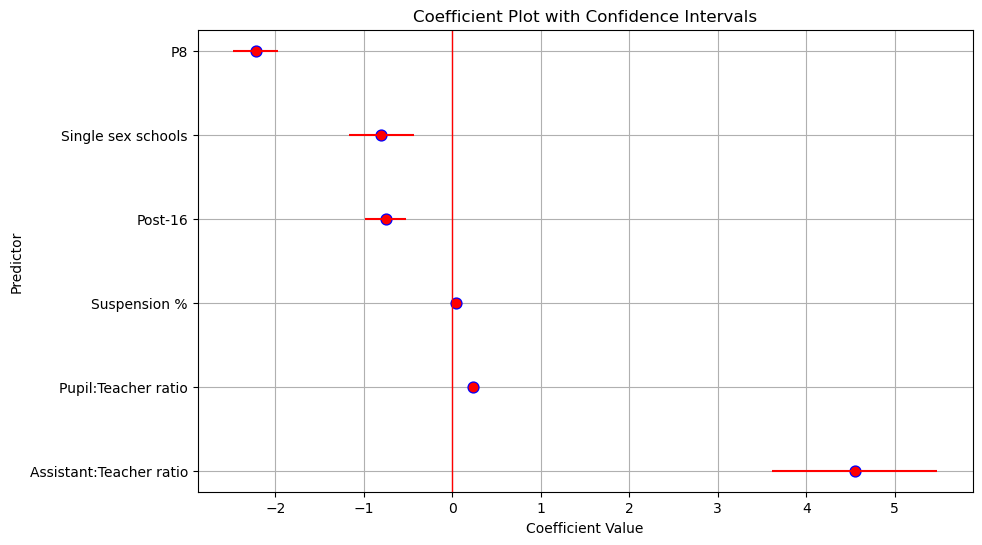

In [485]:
# extract coefficients and confidence intervals
coef = model.params
conf = model.conf_int()

# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1]
}).reset_index().rename(columns={'index': 'Predictor'})

#coef_df = coef_df[coef_df['Predictor'] != 'const']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')

# rename labels using dictionary
coef_df['Predictor'] = coef_df['Predictor'].map(corr_names)

# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df['Coefficient'], coef_df['Predictor'], 
             xerr=[coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

### Add in control variables

#### individual controls

In [264]:
controls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Attainment_8           2972 non-null   float64
 1   absence_rate_non_excl  2972 non-null   float64
 2   selective              2972 non-null   int64  
 3   perc_boys              2972 non-null   float64
 4   FSM                    2972 non-null   float64
 5   sen_support            2972 non-null   float64
 6   White_British          2972 non-null   float64
 7   KS2_history            2972 non-null   float64
 8   IMD                    2972 non-null   float64
 9   urban_binary           2972 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 255.4 KB


In [265]:
control_results = {}

for c in controls:
    x = data_transformed[c]
    y = data_transformed['not_sustained_rate']

    model = sm.OLS(y, x).fit()

    control_results[c] = model.summary()
    

In [266]:
control_results

{'Attainment_8': <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.550
 Model:                            OLS   Adj. R-squared (uncentered):              0.550
 Method:                 Least Squares   F-statistic:                              3631.
 Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
 Time:                        10:15:24   Log-Likelihood:                         -8589.7
 No. Observations:                2972   AIC:                                  1.718e+04
 Df Residuals:                    2971   BIC:                                  1.719e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust                                                  
                    coef    std err         

#### all predictors and all controls

In [267]:
x = predictors_controls

In [268]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              723.7
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:15:27   Log-Likelihood:                         -6855.3
No. Observations:                2972   AIC:                                  1.376e+04
Df Residuals:                    2947   BIC:                                  1.391e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
headcount                           -0.0002      0.000     -1.660      0.097      -0.001    4.49e-05
pupil_teacher_ratio                 -0.0256      0.021     -1.235      0.217      -0.066       0.015
assistant_teacher_ratio              0.2972      0.417      0.713      0.476      -0.520       1.114
susp_rate                            0.0140      0.002      6.016      0.000       0.009       0.019
Progress_8                           0.7729      0.232      3.332      0.001       0.318       1.228
post16                              -0.8183      0.109     -7.501      0.000      -1.032      -0.604
Ofsted_rating                       -0.0304      0.041     -0.748      0.455      -0.110       0.049
faith_binary                        -0.1614      0.141     -1.143      0.253      -0.438       0.115
single_sex_binary                   -0.5568      0.178     -3.135      0.002      -0.905      -0.209
type_Academy sponsor led             0.8819      0.130      6.807      0.000       0.628       1.136
type_Community school               -0.1345      0.167     -0.808      0.419      -0.461       0.192
type_Foundation school               0.0175      0.214      0.082      0.935      -0.402       0.437
type_Free schools                    0.3001      0.251      1.194      0.232      -0.193       0.793
type_Voluntary aided school         -0.1593      0.218     -0.730      0.465      -0.587       0.269
type_Voluntary controlled school    -0.7012      0.540     -1.298      0.194      -1.760       0.358
Attainment_8                        -0.1228      0.020     -6.038      0.000      -0.163      -0.083
absence_rate_non_excl                0.1284      0.032      3.993      0.000       0.065       0.192
selective                            1.2522      0.343      3.650      0.000       0.580       1.925
perc_boys                            0.0066      0.003      2.338      0.019       0.001       0.012
FSM                                  0.1001      0.007     15.205      0.000       0.087       0.113
sen_support                          0.0287      0.010      2.816      0.005       0.009       0.049
White_British                        0.0194      0.002      8.856      0.000       0.015       0.024
KS2_history                          0.0588      0.012      4.844      0.000       0.035       0.083
IMD                                 -0.0460      0.020     -2.253      0.024      -0.086      -0.006
urban_binary                         0.5583      0.144      3.883      0.000       0.276       0.840
==============================================================================
Omnibus:                      395.026   Durbin-Watson:                   1.80

In [269]:
controls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Attainment_8           2972 non-null   float64
 1   absence_rate_non_excl  2972 non-null   float64
 2   selective              2972 non-null   int64  
 3   perc_boys              2972 non-null   float64
 4   FSM                    2972 non-null   float64
 5   sen_support            2972 non-null   float64
 6   White_British          2972 non-null   float64
 7   KS2_history            2972 non-null   float64
 8   IMD                    2972 non-null   float64
 9   urban_binary           2972 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 255.4 KB


#### forward selection controls

In [493]:
x = data_transformed[[
    'pupil_teacher_ratio',
    'assistant_teacher_ratio', 
    'susp_rate',
    'post16',
    'Progress_8',
    'single_sex_binary',
    # controls
    'FSM'
]]

In [494]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.842
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                              2258.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:06:43   Log-Likelihood:                         -7034.2
No. Observations:                2972   AIC:                                  1.408e+04
Df Residuals:                    2965   BIC:                                  1.412e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
pupil_teacher_ratio         0.1128      0.009     12.638      0.000       0.095       0.130
assistant_teacher_ratio     1.4976      0.420      3.569      0.000       0.675       2.320
susp_rate                   0.0241      0.002     10.618      0.000       0.020       0.029
post16                     -0.8306      0.101     -8.204      0.000      -1.029      -0.632
Progress_8                 -1.2114      0.117    -10.391      0.000      -1.440      -0.983
single_sex_binary          -0.9718      0.163     -5.977      0.000      -1.291      -0.653
FSM                         0.1308      0.004     32.319      0.000       0.123       0.139
==============================================================================
Omnibus:                      360.920   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              833.973
Skew:                           0.714   Prob(JB):                    8.04e-182
Kurtosis:                       5.167   Cond. No.                         368.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [495]:
model.aic

14082.418515766218

In [496]:
x = data_transformed[[
    'pupil_teacher_ratio',
    'assistant_teacher_ratio', 
    'susp_rate',
    'post16',
    'Progress_8',
    'single_sex_binary',
    # controls
    'FSM',
    'absence_rate_non_excl'
]]

In [497]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              2052.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:07:22   Log-Likelihood:                         -6986.0
No. Observations:                2972   AIC:                                  1.399e+04
Df Residuals:                    2964   BIC:                                  1.404e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
pupil_teacher_ratio         0.0215      0.013      1.688      0.092      -0.003       0.046
assistant_teacher_ratio     1.0642      0.415      2.563      0.010       0.250       1.878
susp_rate                   0.0186      0.002      8.077      0.000       0.014       0.023
post16                     -0.9991      0.101     -9.885      0.000      -1.197      -0.801
Progress_8                 -0.7460      0.124     -6.016      0.000      -0.989      -0.503
single_sex_binary          -0.9490      0.160     -5.931      0.000      -1.263      -0.635
FSM                         0.1122      0.004     25.468      0.000       0.104       0.121
absence_rate_non_excl       0.2655      0.027      9.886      0.000       0.213       0.318
==============================================================================
Omnibus:                      388.594   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              889.199
Skew:                           0.765   Prob(JB):                    8.18e-194
Kurtosis:                       5.200   Cond. No.                         378.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [498]:
model.aic

13988.000104134922

In [499]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [500]:
vif_values

predictor        VIF
5        single_sex_binary   1.335243
4               Progress_8   1.807279
2                susp_rate   2.462274
3                   post16   2.940475
1  assistant_teacher_ratio   5.370324
6                      FSM   6.845306
0      pupil_teacher_ratio  21.713993
7    absence_rate_non_excl  27.488100

In [501]:
x = data_transformed[[
    #'pupil_teacher_ratio',
    'assistant_teacher_ratio', 
    'susp_rate',
    'post16',
    'Progress_8',
    'single_sex_binary',
    # controls
    'FSM',
    'absence_rate_non_excl'
]]

In [502]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              2343.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:11:08   Log-Likelihood:                         -6987.4
No. Observations:                2972   AIC:                                  1.399e+04
Df Residuals:                    2965   BIC:                                  1.403e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
assistant_teacher_ratio     1.2823      0.395      3.249      0.001       0.508       2.056
susp_rate                   0.0184      0.002      7.999      0.000       0.014       0.023
post16                     -0.9607      0.099     -9.752      0.000      -1.154      -0.768
Progress_8                 -0.6589      0.113     -5.842      0.000      -0.880      -0.438
single_sex_binary          -0.9162      0.159     -5.767      0.000      -1.228      -0.605
FSM                         0.1118      0.004     25.405      0.000       0.103       0.120
absence_rate_non_excl       0.2983      0.019     16.114      0.000       0.262       0.335
==============================================================================
Omnibus:                      378.691   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              867.897
Skew:                           0.747   Prob(JB):                    3.46e-189
Kurtosis:                       5.185   Cond. No.                         338.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [503]:
model.aic

13988.854256285817

In [504]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [505]:
vif_values

predictor        VIF
4        single_sex_binary   1.315494
3               Progress_8   1.494037
1                susp_rate   2.456034
2                   post16   2.791254
0  assistant_teacher_ratio   4.849813
5                      FSM   6.822805
6    absence_rate_non_excl  13.055815

In [506]:
x = data_transformed[[
    'assistant_teacher_ratio', 
    'susp_rate',
    'post16',
    'Progress_8',
    'single_sex_binary',
    # controls
    'absence_rate_non_excl',
    'FSM',
    'sen_support'
]]

In [507]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              2079.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:18:45   Log-Likelihood:                         -6969.5
No. Observations:                2972   AIC:                                  1.396e+04
Df Residuals:                    2964   BIC:                                  1.400e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
assistant_teacher_ratio     0.8437      0.399      2.114      0.035       0.061       1.626
susp_rate                   0.0190      0.002      8.298      0.000       0.015       0.023
post16                     -0.9294      0.098     -9.477      0.000      -1.122      -0.737
Progress_8                 -0.6904      0.112     -6.151      0.000      -0.911      -0.470
single_sex_binary          -0.8854      0.158     -5.602      0.000      -1.195      -0.576
absence_rate_non_excl       0.2399      0.021     11.527      0.000       0.199       0.281
FSM                         0.1048      0.005     23.163      0.000       0.096       0.114
sen_support                 0.0591      0.010      5.997      0.000       0.040       0.078
==============================================================================
Omnibus:                      386.015   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              923.426
Skew:                           0.746   Prob(JB):                    3.02e-201
Kurtosis:                       5.287   Cond. No.                         359.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [508]:
model.aic

13955.015818658896

In [509]:
x = data_transformed[[
    'assistant_teacher_ratio', 
    'susp_rate',
    'post16',
    'Progress_8',
    'single_sex_binary',
    # controls
    'absence_rate_non_excl',
    'FSM',
    'sen_support',
    'KS2_history'
]]

In [510]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              1848.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:20:36   Log-Likelihood:                         -6969.1
No. Observations:                2972   AIC:                                  1.396e+04
Df Residuals:                    2963   BIC:                                  1.401e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
assistant_teacher_ratio     0.7362      0.416      1.770      0.077      -0.079       1.552
susp_rate                   0.0194      0.002      8.337      0.000       0.015       0.024
post16                     -0.9573      0.103     -9.327      0.000      -1.159      -0.756
Progress_8                 -0.7534      0.131     -5.733      0.000      -1.011      -0.496
single_sex_binary          -0.9146      0.161     -5.674      0.000      -1.231      -0.599
absence_rate_non_excl       0.2189      0.031      7.088      0.000       0.158       0.279
FSM                         0.1049      0.005     23.173      0.000       0.096       0.114
sen_support                 0.0574      0.010      5.721      0.000       0.038       0.077
KS2_history                 0.0024      0.003      0.921      0.357      -0.003       0.008
==============================================================================
Omnibus:                      390.775   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              931.356
Skew:                           0.756   Prob(JB):                    5.74e-203
Kurtosis:                       5.288   Cond. No.                         993.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [511]:
model.aic

13956.164539707446

In [515]:
x = data_transformed[[
    'assistant_teacher_ratio', 
    'susp_rate',
    'post16',
    'Progress_8',
    'single_sex_binary',
    # controls
    'absence_rate_non_excl',
    'perc_boys',
    'FSM',
    'sen_support'
]]

In [516]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                              1853.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:27:08   Log-Likelihood:                         -6966.0
No. Observations:                2972   AIC:                                  1.395e+04
Df Residuals:                    2963   BIC:                                  1.400e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
assistant_teacher_ratio     0.6525      0.405      1.610      0.107      -0.142       1.447
susp_rate                   0.0193      0.002      8.423      0.000       0.015       0.024
post16                     -0.9767      0.100     -9.808      0.000      -1.172      -0.781
Progress_8                 -0.7511      0.114     -6.563      0.000      -0.976      -0.527
single_sex_binary          -0.8633      0.158     -5.461      0.000      -1.173      -0.553
absence_rate_non_excl       0.2177      0.022      9.709      0.000       0.174       0.262
perc_boys                   0.0065      0.002      2.648      0.008       0.002       0.011
FSM                         0.1049      0.005     23.197      0.000       0.096       0.114
sen_support                 0.0546      0.010      5.470      0.000       0.035       0.074
==============================================================================
Omnibus:                      394.706   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              938.371
Skew:                           0.763   Prob(JB):                    1.72e-204
Kurtosis:                       5.291   Cond. No.                         564.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [517]:
model.aic

13949.989932967885

In [518]:
x = data_transformed[[
    'susp_rate',
    'post16',
    'Progress_8',
    'single_sex_binary',
    # controls
    'absence_rate_non_excl',
    'perc_boys',
    'FSM',
    'sen_support',
    'White_British'
]]

In [519]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.852
Method:                 Least Squares   F-statistic:                              1903.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:27:30   Log-Likelihood:                         -6932.3
No. Observations:                2972   AIC:                                  1.388e+04
Df Residuals:                    2963   BIC:                                  1.394e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
susp_rate                 0.0187      0.002      8.249      0.000       0.014       0.023
post16                   -0.9636      0.098     -9.845      0.000      -1.155      -0.772
Progress_8               -0.6694      0.113     -5.922      0.000      -0.891      -0.448
single_sex_binary        -0.7801      0.156     -4.993      0.000      -1.086      -0.474
absence_rate_non_excl     0.1034      0.026      3.978      0.000       0.052       0.154
perc_boys                 0.0026      0.002      1.063      0.288      -0.002       0.007
FSM                       0.1293      0.005     24.526      0.000       0.119       0.140
sen_support               0.0358      0.010      3.550      0.000       0.016       0.056
White_British             0.0159      0.002      8.404      0.000       0.012       0.020
==============================================================================
Omnibus:                      426.152   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1066.581
Skew:                           0.801   Prob(JB):                    2.48e-232
Kurtosis:                       5.459   Cond. No.                         330.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [520]:
model.aic

13882.578336500781

In [521]:
x = data_transformed[[
   'susp_rate',
    'post16',
    'Progress_8',
    'single_sex_binary',
    # controls
    'absence_rate_non_excl',
    'FSM',
    'sen_support',
    'White_British'
]]

In [522]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.852
Method:                 Least Squares   F-statistic:                              2140.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:31:35   Log-Likelihood:                         -6932.9
No. Observations:                2972   AIC:                                  1.388e+04
Df Residuals:                    2964   BIC:                                  1.393e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
susp_rate                 0.0185      0.002      8.202      0.000       0.014       0.023
post16                   -0.9462      0.097     -9.805      0.000      -1.135      -0.757
Progress_8               -0.6419      0.110     -5.833      0.000      -0.858      -0.426
single_sex_binary        -0.7884      0.156     -5.052      0.000      -1.094      -0.482
absence_rate_non_excl     0.1097      0.025      4.336      0.000       0.060       0.159
FSM                       0.1300      0.005     24.874      0.000       0.120       0.140
sen_support               0.0372      0.010      3.724      0.000       0.018       0.057
White_British             0.0164      0.002      8.865      0.000       0.013       0.020
==============================================================================
Omnibus:                      423.092   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1061.035
Skew:                           0.795   Prob(JB):                    3.97e-231
Kurtosis:                       5.458   Cond. No.                         278.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [523]:
model.aic

13881.712316297453

In [524]:
x = data_transformed[[
     'susp_rate',
    'post16',
    'Progress_8',
    'single_sex_binary',
    # controls
    'absence_rate_non_excl',
    'FSM',
    'sen_support',
    'White_British',
        'urban_binary' 
]]

In [525]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.852
Method:                 Least Squares   F-statistic:                              1904.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:33:13   Log-Likelihood:                         -6931.6
No. Observations:                2972   AIC:                                  1.388e+04
Df Residuals:                    2963   BIC:                                  1.394e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
susp_rate                 0.0188      0.002      8.283      0.000       0.014       0.023
post16                   -0.9757      0.098     -9.927      0.000      -1.168      -0.783
Progress_8               -0.6857      0.113     -6.041      0.000      -0.908      -0.463
single_sex_binary        -0.8312      0.158     -5.248      0.000      -1.142      -0.521
absence_rate_non_excl     0.0994      0.026      3.804      0.000       0.048       0.151
FSM                       0.1277      0.005     23.565      0.000       0.117       0.138
sen_support               0.0374      0.010      3.741      0.000       0.018       0.057
White_British             0.0163      0.002      8.803      0.000       0.013       0.020
urban_binary              0.2032      0.129      1.569      0.117      -0.051       0.457
==============================================================================
Omnibus:                      431.426   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1082.902
Skew:                           0.809   Prob(JB):                    7.09e-236
Kurtosis:                       5.475   Cond. No.                         282.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [526]:
model.aic

13881.243151604263

In [530]:
x = data_transformed[[
    'susp_rate',
    'post16',
    'Progress_8',
    'single_sex_binary',
    # controls
    'Attainment_8',
    'absence_rate_non_excl',
    'FSM',
    'sen_support',
    'White_British'
]]

In [531]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              1918.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:38:35   Log-Likelihood:                         -6921.9
No. Observations:                2972   AIC:                                  1.386e+04
Df Residuals:                    2963   BIC:                                  1.392e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
susp_rate                 0.0167      0.002      7.290      0.000       0.012       0.021
post16                   -0.8084      0.101     -8.038      0.000      -1.006      -0.611
Progress_8               -0.0820      0.162     -0.505      0.613      -0.400       0.236
single_sex_binary        -0.5437      0.164     -3.315      0.001      -0.865      -0.222
Attainment_8             -0.0228      0.005     -4.680      0.000      -0.032      -0.013
absence_rate_non_excl     0.1757      0.029      6.082      0.000       0.119       0.232
FSM                       0.1342      0.005     25.394      0.000       0.124       0.145
sen_support               0.0383      0.010      3.843      0.000       0.019       0.058
White_British             0.0207      0.002     10.051      0.000       0.017       0.025
==============================================================================
Omnibus:                      405.855   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1038.517
Skew:                           0.759   Prob(JB):                    3.08e-226
Kurtosis:                       5.466   Cond. No.                         326.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [532]:
model.aic

13861.827054276697

In [564]:
x = data_transformed[[
    'susp_rate',
    'post16',
    
    'single_sex_binary',
    # controls
    'Attainment_8',
    'absence_rate_non_excl',
    'FSM',
    'sen_support',
    'White_British'
]]

In [565]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              2159.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        11:04:08   Log-Likelihood:                         -6922.0
No. Observations:                2972   AIC:                                  1.386e+04
Df Residuals:                    2964   BIC:                                  1.391e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
susp_rate                 0.0167      0.002      7.299      0.000       0.012       0.021
post16                   -0.8065      0.100     -8.025      0.000      -1.003      -0.609
single_sex_binary        -0.5413      0.164     -3.301      0.001      -0.863      -0.220
Attainment_8             -0.0246      0.003     -7.478      0.000      -0.031      -0.018
absence_rate_non_excl     0.1815      0.027      6.838      0.000       0.129       0.234
FSM                       0.1347      0.005     25.933      0.000       0.124       0.145
sen_support               0.0381      0.010      3.829      0.000       0.019       0.058
White_British             0.0211      0.002     10.889      0.000       0.017       0.025
==============================================================================
Omnibus:                      406.827   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1044.230
Skew:                           0.760   Prob(JB):                    1.77e-227
Kurtosis:                       5.474   Cond. No.                         322.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [566]:
model.aic

13860.083306860994

In [567]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [568]:
vif_values

predictor        VIF
2      single_sex_binary   1.463399
0              susp_rate   2.534448
1                 post16   3.034224
7          White_British   8.853184
6            sen_support   9.318831
5                    FSM   9.923080
3           Attainment_8  12.095091
4  absence_rate_non_excl  28.039636

In [536]:
x = data_transformed[[
    'susp_rate',
    'post16',
    
    'single_sex_binary',
    # controls
    'Attainment_8',
    'absence_rate_non_excl',
    'FSM',
    'sen_support',
    'White_British',
        'IMD'
        
]]

In [537]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              1922.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:44:41   Log-Likelihood:                         -6919.2
No. Observations:                2972   AIC:                                  1.386e+04
Df Residuals:                    2963   BIC:                                  1.391e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
susp_rate                 0.0163      0.002      7.139      0.000       0.012       0.021
post16                   -0.7904      0.101     -7.854      0.000      -0.988      -0.593
single_sex_binary        -0.5968      0.166     -3.606      0.000      -0.921      -0.272
Attainment_8             -0.0204      0.004     -5.442      0.000      -0.028      -0.013
absence_rate_non_excl     0.1933      0.027      7.162      0.000       0.140       0.246
FSM                       0.1302      0.006     23.611      0.000       0.119       0.141
sen_support               0.0395      0.010      3.961      0.000       0.020       0.059
White_British             0.0219      0.002     11.141      0.000       0.018       0.026
IMD                      -0.0463      0.020     -2.362      0.018      -0.085      -0.008
==============================================================================
Omnibus:                      408.320   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1048.155
Skew:                           0.763   Prob(JB):                    2.49e-228
Kurtosis:                       5.478   Cond. No.                         326.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [538]:
model.aic

13856.494430892384

In [539]:
x = data_transformed[[
    'susp_rate',
    'post16',
    
    'single_sex_binary',
    # controls
    'Attainment_8',
    'absence_rate_non_excl',
    'selective',
    'FSM',
    'sen_support',
    'White_British',
        'IMD'
        
]]

In [540]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              1732.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:47:57   Log-Likelihood:                         -6917.1
No. Observations:                2972   AIC:                                  1.385e+04
Df Residuals:                    2962   BIC:                                  1.391e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
susp_rate                 0.0159      0.002      6.908      0.000       0.011       0.020
post16                   -0.7902      0.101     -7.856      0.000      -0.987      -0.593
single_sex_binary        -0.6915      0.172     -4.032      0.000      -1.028      -0.355
Attainment_8             -0.0242      0.004     -5.814      0.000      -0.032      -0.016
absence_rate_non_excl     0.1956      0.027      7.247      0.000       0.143       0.249
selective                 0.5483      0.262      2.091      0.037       0.034       1.063
FSM                       0.1323      0.006     23.632      0.000       0.121       0.143
sen_support               0.0428      0.010      4.242      0.000       0.023       0.063
White_British             0.0219      0.002     11.140      0.000       0.018       0.026
IMD                      -0.0366      0.020     -1.820      0.069      -0.076       0.003
==============================================================================
Omnibus:                      402.209   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1035.819
Skew:                           0.751   Prob(JB):                    1.19e-225
Kurtosis:                       5.471   Cond. No.                         530.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [541]:
model.aic

13854.11110255573

In [542]:
x = data_transformed[[
    'susp_rate',
    'post16',
    
    'single_sex_binary',
    # controls
    'Attainment_8',
    'absence_rate_non_excl',
    'selective',
    'FSM',
    'sen_support',
    'White_British'
        
]]

In [543]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              1923.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:51:08   Log-Likelihood:                         -6918.7
No. Observations:                2972   AIC:                                  1.386e+04
Df Residuals:                    2963   BIC:                                  1.391e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
susp_rate                 0.0161      0.002      6.982      0.000       0.012       0.021
post16                   -0.8022      0.100     -7.989      0.000      -0.999      -0.605
single_sex_binary        -0.6688      0.171     -3.909      0.000      -1.004      -0.333
Attainment_8             -0.0281      0.004     -7.904      0.000      -0.035      -0.021
absence_rate_non_excl     0.1873      0.027      7.038      0.000       0.135       0.239
selective                 0.6579      0.255      2.576      0.010       0.157       1.159
FSM                       0.1360      0.005     26.085      0.000       0.126       0.146
sen_support               0.0424      0.010      4.207      0.000       0.023       0.062
White_British             0.0213      0.002     10.986      0.000       0.017       0.025
==============================================================================
Omnibus:                      400.038   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1031.397
Skew:                           0.747   Prob(JB):                    1.08e-224
Kurtosis:                       5.469   Cond. No.                         518.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [544]:
model.aic

13855.432632310758

In [545]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [546]:
vif_values

predictor        VIF
2      single_sex_binary   1.597097
5              selective   1.678008
0              susp_rate   2.564725
1                 post16   3.035048
8          White_British   8.864974
7            sen_support   9.581288
6                    FSM  10.018054
3           Attainment_8  14.111696
4  absence_rate_non_excl  28.240977

## Final Model

In [569]:
x = data_transformed[[
    'susp_rate',
    'post16',
    
    'single_sex_binary',
    # controls
    'Attainment_8',
    #'absence_rate_non_excl',
    'FSM',
    'sen_support',
    'White_British'
        
]]

In [570]:
y = data_transformed['not_sustained_rate']

In [571]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.851
Model:                            OLS   Adj. R-squared (uncentered):              0.851
Method:                 Least Squares   F-statistic:                              2423.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                        0.00
Time:                        11:08:15   Log-Likelihood:                         -6945.3
No. Observations:                2972   AIC:                                  1.390e+04
Df Residuals:                    2965   BIC:                                  1.395e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
susp_rate             0.0213      0.002      9.688      0.000       0.017       0.026
post16               -0.6824      0.100     -6.852      0.000      -0.878      -0.487
single_sex_binary    -0.5931      0.165     -3.594      0.000      -0.917      -0.269
Attainment_8         -0.0175      0.003     -5.554      0.000      -0.024      -0.011
FSM                   0.1550      0.004     36.162      0.000       0.147       0.163
sen_support           0.0514      0.010      5.222      0.000       0.032       0.071
White_British         0.0276      0.002     16.205      0.000       0.024       0.031
==============================================================================
Omnibus:                      401.387   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1071.112
Skew:                           0.739   Prob(JB):                    2.58e-233
Kurtosis:                       5.543   Cond. No.                         320.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [572]:
model.aic

13904.602724908991

### VIF scores and corr matrix

In [575]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [576]:
vif_values

predictor        VIF
2  single_sex_binary   1.460276
0          susp_rate   2.312075
1             post16   2.935369
4                FSM   6.660411
6      White_British   6.730475
5        sen_support   8.965146
3       Attainment_8  10.875489

In [577]:
x.describe()

susp_rate       post16  single_sex_binary  Attainment_8          FSM  \
count  2972.000000  2972.000000        2972.000000   2972.000000  2972.000000   
mean     20.286441     0.625841           0.113392     47.261137    24.482470   
std      24.449683     0.483986           0.317124      9.261298    12.930734   
min       0.000000     0.000000           0.000000     18.800000     1.300000   
25%       6.619397     0.000000           0.000000     41.300000    14.700000   
50%      13.096390     1.000000           0.000000     46.100000    22.500000   
75%      24.544380     1.000000           0.000000     51.500000    32.725000   
max     358.064520     1.000000           1.000000     87.600000    75.400000   

       sen_support  White_British  
count  2972.000000    2972.000000  
mean     12.866762      63.886137  
std       5.493081      28.961852  
min       0.403226       0.000000  
25%       9.227085      44.400000  
50%      12.608697      75.300000  
75%      16.039934      87.300000  
max      48.316252      99.300000

In [578]:
vars = x.columns.tolist()
vars

['susp_rate',
 'post16',
 'single_sex_binary',
 'Attainment_8',
 'FSM',
 'sen_support',
 'White_British']

In [579]:
vars_for_corr = data_transformed[[
'susp_rate', 'post16', 'single_sex_binary', 'Attainment_8', 'FSM', 'sen_support', 'White_British', 'absence_rate_non_excl'
]]


In [580]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

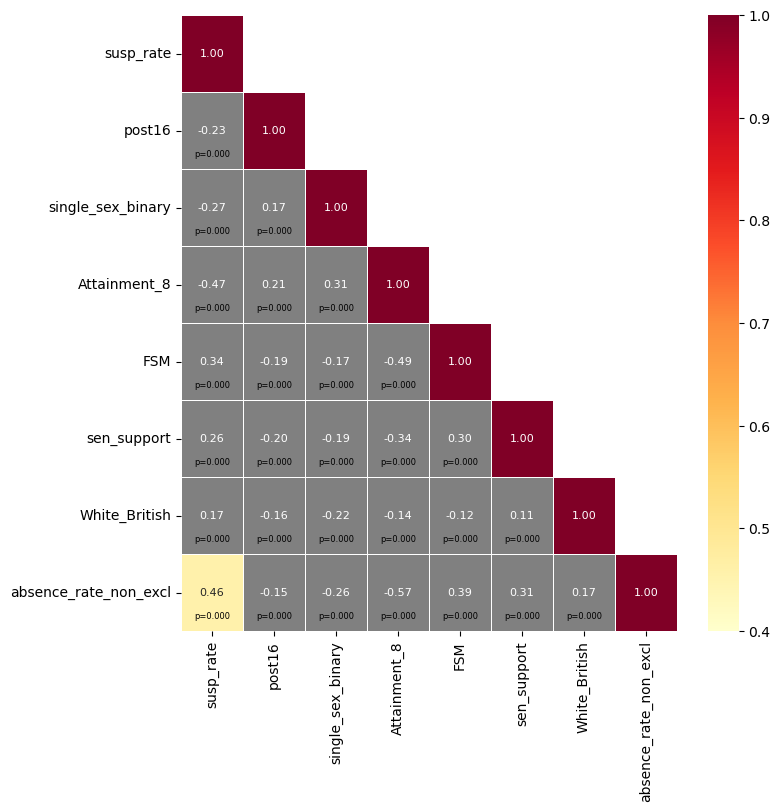

In [581]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


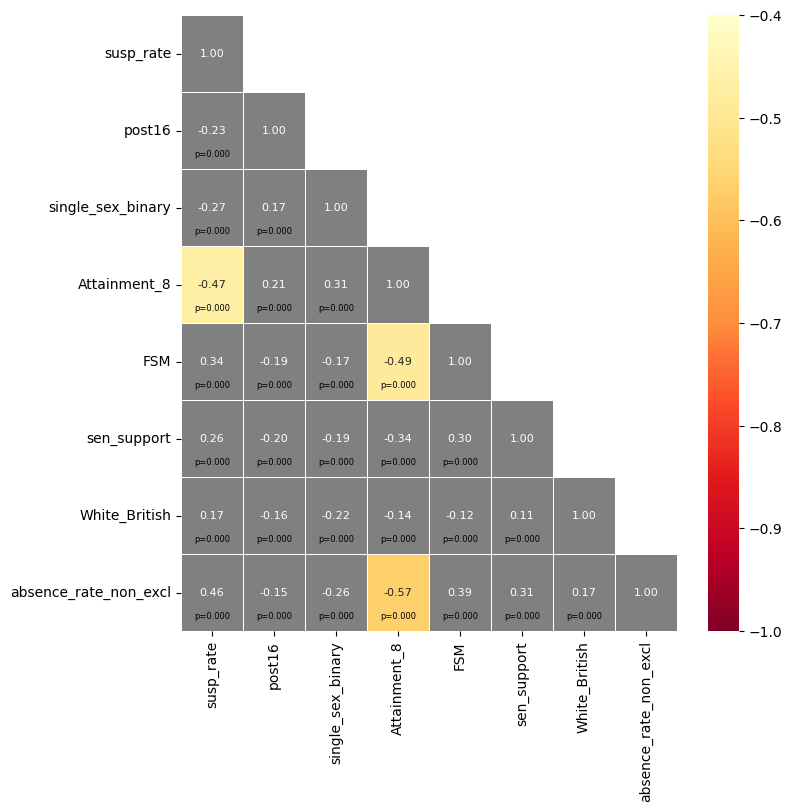

In [582]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

### Visualise

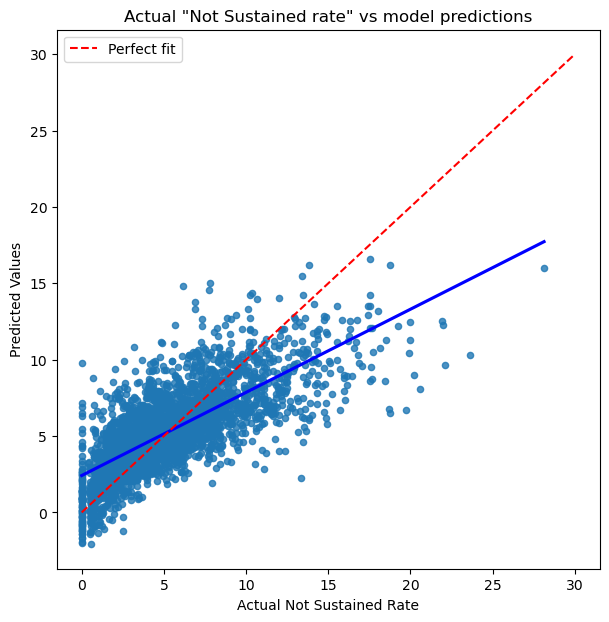

In [583]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=data_transformed['not_sustained_rate'], 
            y=model.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            ci=None
           )

plt.plot([0, 30], 
         [0, 30], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Actual "Not Sustained rate" vs model predictions')
plt.xlabel('Actual Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

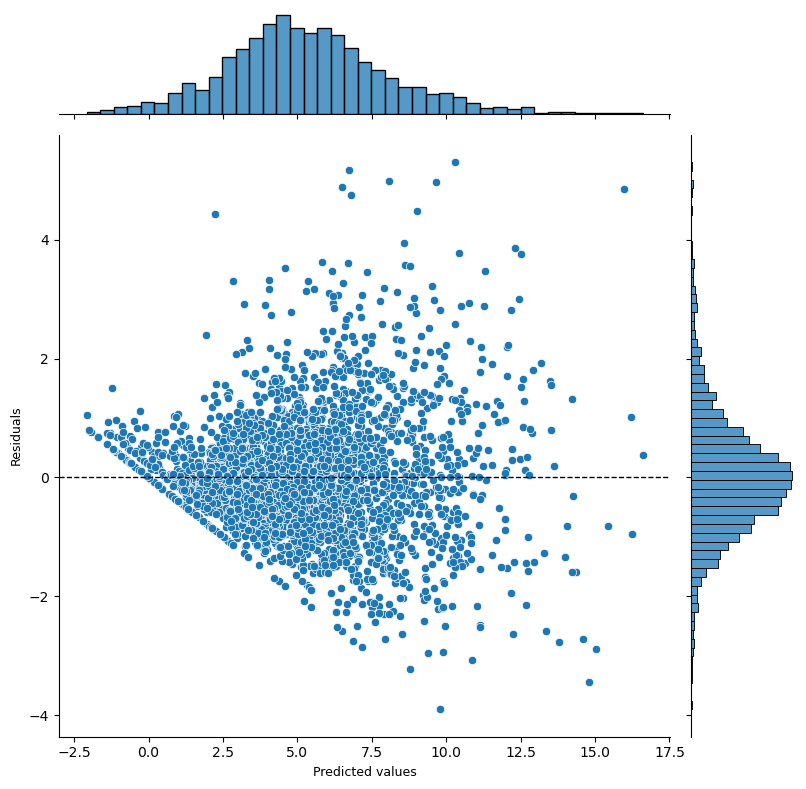

In [584]:
# create jointplot
g = sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Predicted values', 'Residuals', fontsize=9);

#### Coefficient plot

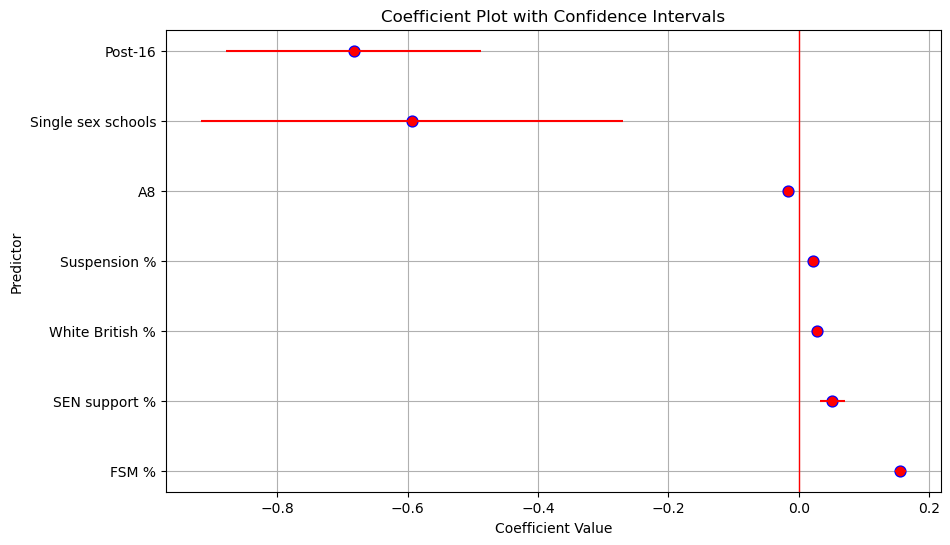

In [585]:
# extract coefficients and confidence intervals
coef = model.params
conf = model.conf_int()

# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1]
}).reset_index().rename(columns={'index': 'Predictor'})

#coef_df = coef_df[coef_df['Predictor'] != 'const']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')

# rename labels using dictionary
coef_df['Predictor'] = coef_df['Predictor'].map(corr_names)

# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df['Coefficient'], coef_df['Predictor'], 
             xerr=[coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

In [5]:

qqplot(model.resid_pearson, line='r')

NameError: name 'model' is not defined

# Add predictions and residuals to dataframe

In [586]:
data['predictions'] = model.fittedvalues

In [587]:
data['residuals'] = model.resid_pearson

Residuals: positive values indicate true value is higher than the model predicts. Negative values that the true value is lower. 

In [588]:
data.describe()

URN  not_sustained_rate  total_absence  persistent_absence  \
count    2972.000000         2972.000000    2972.000000         2972.000000   
mean   133863.203567            5.354765       9.096770           26.750976   
std     12011.537035            3.670508       2.437697            8.591171   
min    100050.000000            0.000000       3.100000            2.800000   
25%    135760.750000            2.720164       7.500000           21.200000   
50%    137338.500000            4.591837       8.900000           26.600000   
75%    140412.750000            7.272727      10.400000           32.100000   
max    148866.000000           28.125000      32.600000           97.800000   

               FSM  White_British          EAL    perc_boys    headcount  \
count  2972.000000    2972.000000  2972.000000  2972.000000  2972.000000   
mean     24.482470      63.886137    17.662786    50.348293  1115.075034   
std      12.930734      28.961852    18.402224    16.637625   385.419425   
min       1.300000       0.000000     0.000000     0.000000    81.000000   
25%      14.700000      44.400000     4.500000    49.178838   847.000000   
50%      22.500000      75.300000    10.100000    50.977719  1082.000000   
75%      32.725000      87.300000    24.900000    53.044672  1359.000000   
max      75.400000      99.300000    92.700000   100.000000  2990.000000   

       perm_excl_rate    susp_rate  one_plus_susp_rate  KS4_headcount  \
count     2972.000000  2972.000000         2972.000000    2972.000000   
mean         0.243747    20.286441            7.579353     185.130552   
std          0.326898    24.449683            5.256525      61.606266   
min          0.000000     0.000000            0.000000      17.000000   
25%          0.000000     6.619397            3.917765     145.000000   
50%          0.134005    13.096390            6.508540     180.000000   
75%          0.345252    24.544380            9.902157     224.250000   
max          3.024910   358.064520           37.366550     451.000000   

       KS2_history  Attainment_8   Progress_8    selective  KS4_pass_rate  \
count  2972.000000   2972.000000  2972.000000  2972.000000    2972.000000   
mean    104.437248     47.261137    -0.001413     0.053499      24.690108   
std       2.745410      9.261298     0.505607     0.225065      18.675961   
min      92.100000     18.800000    -3.380000     0.000000       0.000000   
25%     102.800000     41.300000    -0.330000     0.000000      11.000000   
50%     104.200000     46.100000    -0.010000     0.000000      20.000000   
75%     105.500000     51.500000     0.330000     0.000000      33.000000   
max     117.400000     87.600000     2.370000     1.000000     100.000000   

            post16  sen_support         ehcp         IMD  pupil_teacher_ratio  \
count  2972.000000  2972.000000  2972.000000  2972.00000          2972.000000   
mean      0.625841    12.866762     2.529875     5.66319            16.897241   
std       0.483986     5.493081     1.680185     2.81924             2.295918   
min       0.000000     0.403226     0.000000     1.00000             5.300000   
25%       0.000000     9.227085     1.427036     3.00000            15.600000   
50%       1.000000    12.608697     2.238032     6.00000            16.800000   
75%       1.000000    16.039934     3.227958     8.00000            18.000000   
max       1.000000    48.316252    18.468468    10.00000            43.400000   

       assistant_teacher_ratio  absence_rate_non_excl  single_sex_binary  \
count              2972.000000            2972.000000        2972.000000   
mean                  0.230585               8.819434           0.113392   
std                   0.120709               2.263271           0.317124   
min                   0.000000               3.034038           0.000000   
25%                   0.100000               7.330413           0.000000   
50%                   0.200000               8.653188           0.000000   
75%   

In [589]:
data.head()

URN  not_sustained_rate  total_absence  persistent_absence  \
1  137181            5.172414           11.1                38.1   
3  100050            2.824859            7.9                24.8   
4  100051            5.464481           11.4                42.9   
5  100052            1.932367            8.2                24.0   
6  100053            4.469274            8.1                24.7   

               urban_rural denomination   FSM  White_British   EAL  perc_boys  \
1  Urban major conurbation     No faith  41.2           10.8  51.7  56.874466   
3  Urban major conurbation     No faith  35.6           38.8  34.1   4.963971   
4  Urban major conurbation     No faith  61.8            3.9  67.3  56.163114   
5  Urban major conurbation     No faith  41.8           11.4  38.1  51.630023   
6  Urban major conurbation     No faith  34.3           46.3  23.6  65.778160   

    region_name             school_name  headcount  perm_excl_rate  susp_rate  \
1  Inner London         The UCL Academy     1171.0         0.34159   14.51751   
3  Inner London  Parliament Hill School     1249.0         0.08006    9.12730   
4  Inner London      Regent High School     1079.0         0.09268    5.37535   
5  Inner London        Hampstead School     1319.0         0.07582    3.26005   
6  Inner London  Acland Burghley School     1163.0         0.17197    8.25451   

   one_plus_susp_rate  KS4_headcount  KS2_history  Attainment_8  Progress_8  \
1             8.45431            168        105.1          47.4       -0.18   
3             5.04404            174        107.1          59.1        0.61   
4             4.26321            173        103.5          43.8       -0.06   
5             2.65353            197        103.2          44.6       -0.04   
6             4.47120            178        106.0          50.3       -0.17   

   selective  KS4_pass_rate POSTCODE  post16 school_sex                 type  \
1          0             27  NW3 3AQ       1      Mixed  Academy sponsor led   
3          0             40  NW5 1RL       1      Girls     Community school   
4          0             21  NW1 1RX       1      Mixed     Community school   
5          0             10  NW2 3RT       1      Mixed     Community school   
6          0             34  NW5 1UJ       1      Mixed     Community school   

          Ofsted_rating  sen_support      ehcp     LSOA11  IMD  \
1  Requires improvement    10.247652  3.245090  E01000963  8.0   
3                  Good    13.370697  1.281025  E01000912  4.0   
4                  Good    17.886932  3.614458  E01000952  2.0   
5                  Good     9.628506  2.880970  E01000871  7.0   
6                  Good    11.951849  7.480653  E01000928  5.0   

   pupil_teacher_ratio  assistant_teacher_ratio  absence_rate_non_excl  \
1                 13.0                      0.2              10.803701   
3                 14.7                      0.1               7.769210   
4                 11.9                      0.2              11.246731   
5                 14.9                      0.2               8.103096   
6                 12.2                      0.3               7.963311   

   single_sex_binary  faith_binary region_new  urban_binary  predictions  \
1                  0             0     London             1     6.009540   
3                  1             0     London             1     5.161076   
4                  0             0     London             1     9.273487   
5                  0             0     London             1     5.896160   
6                  0             0     London             1     5.821719   

   residuals Ofsted_num  
1  -0.333894          2  
3  -0.931817          3  
4  -1.519249          3  
5  -1.580987          3  
6  -0.539432          3

In [321]:
data.to_csv('predictions_residuals.csv', index=False)

### Visualise residuals

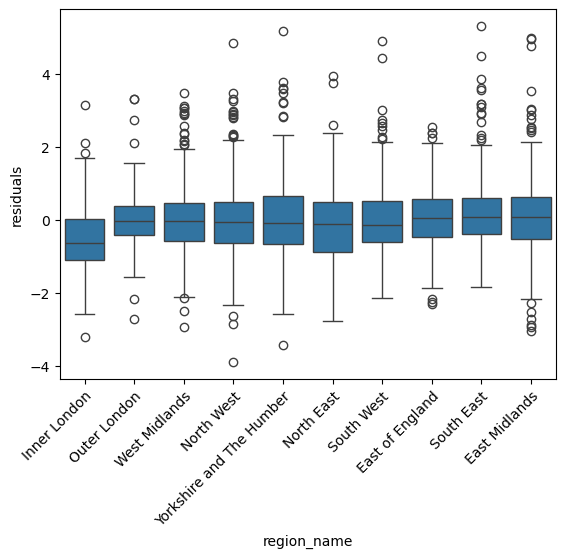

In [590]:
sns.boxplot(data=data, x='region_name', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

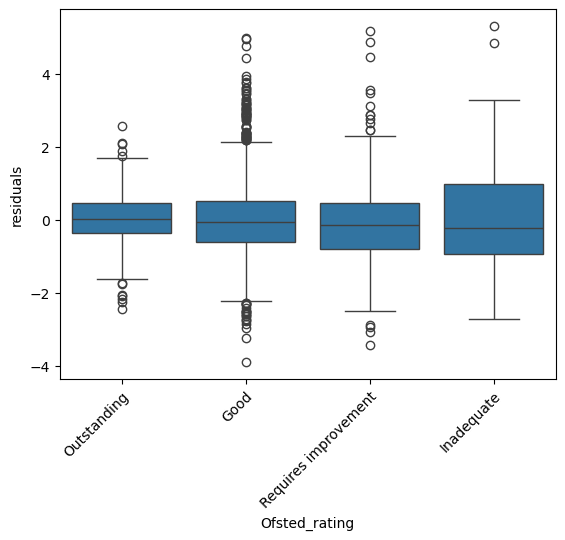

In [591]:
sns.boxplot(data=data, x='Ofsted_rating', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

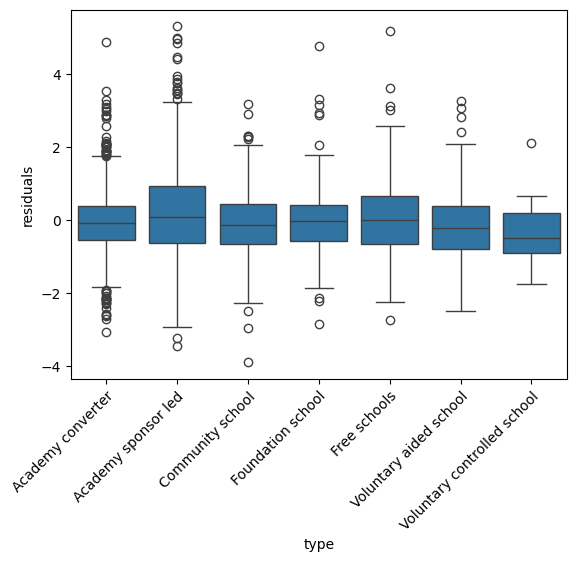

In [592]:
sns.boxplot(data=data, x='type', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

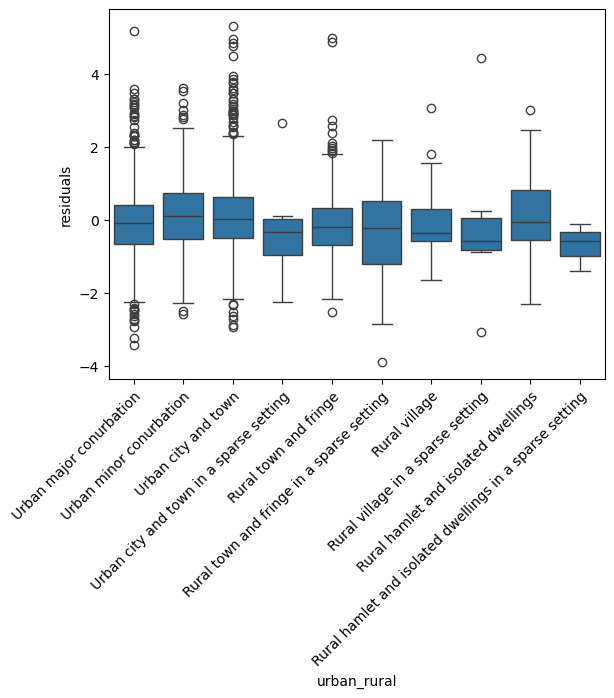

In [593]:
sns.boxplot(data=data, x='urban_rural', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

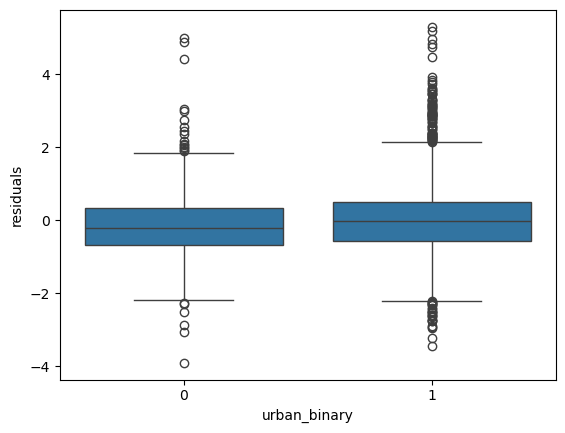

In [594]:
sns.boxplot(data=data, x='urban_binary', y='residuals');

### read in coordinates and map residuals

In [339]:
import geopandas as gpd

In [327]:
coords = pd.read_csv('data_with_coordinates.csv', index_col=0)

In [328]:
coords = coords[['URN', 'Easting', 'Northing']].copy()

In [329]:
coords

URN   Easting  Northing
0     137181  526867.0  184105.0
1     100049  528159.0  184498.0
2     100050  528369.0  186019.0
3     100051  529555.0  183356.0
4     100052  524402.0  185633.0
...      ...       ...       ...
3141  137251  368104.0  521037.0
3142  137338  338127.0  478474.0
3143  136357  360707.0  478609.0
3144  141106  321416.0  471354.0
3145  135940  320952.0  469650.0

[3146 rows x 3 columns]

In [595]:
data_with_coords = data.merge(coords, how='left', on='URN')

In [596]:
data_with_coords['residuals'].describe()

count    2972.000000
mean        0.010124
std         0.998938
min        -3.900046
25%        -0.589492
50%        -0.049888
75%         0.494570
max         5.306354
Name: residuals, dtype: float64

In [597]:
data_with_coords['residuals_banding'] = data_with_coords['residuals']

In [598]:
data_with_coords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   URN                      2972 non-null   int64   
 1   not_sustained_rate       2972 non-null   float64 
 2   total_absence            2972 non-null   float64 
 3   persistent_absence       2972 non-null   float64 
 4   urban_rural              2972 non-null   category
 5   denomination             2972 non-null   category
 6   FSM                      2972 non-null   float64 
 7   White_British            2972 non-null   float64 
 8   EAL                      2972 non-null   float64 
 9   perc_boys                2972 non-null   float64 
 10  region_name              2972 non-null   object  
 11  school_name              2972 non-null   object  
 12  headcount                2972 non-null   float64 
 13  perm_excl_rate           2972 non-null   float64 
 14  susp_rat

In [441]:
print(data_with_coords['residuals_banding'].dtype)

float64


In [599]:
data_with_coords.loc[data_with_coords['residuals'] < -1, 'residuals_banding'] = -1
data_with_coords.loc[(data_with_coords['residuals'] >= -1) & (data_with_coords['residuals_banding'] <= 1), 'residuals_banding'] = 0
data_with_coords.loc[data_with_coords['residuals'] > 1, 'residuals_banding'] = 1

In [600]:
data_with_coords.loc[data_with_coords['residuals'] < -1]

URN  not_sustained_rate  total_absence  persistent_absence  \
2     100051            5.464481           11.4                42.9   
3     100052            1.932367            8.2                24.0   
6     100055            3.875969            7.6                20.8   
9     100171            2.840909            7.4                22.3   
20    141716            0.000000            4.2                 6.1   
...      ...                 ...            ...                 ...   
2938  112377            0.000000           11.0                37.6   
2946  148703            4.098361           13.1                42.6   
2955  112378            0.000000            9.9                38.6   
2967  137107            0.000000            6.5                21.0   
2970  136357            0.000000            6.8                21.2   

                                    urban_rural denomination   FSM  \
2                       Urban major conurbation     No faith  61.8   
3                       Urban major conurbation     No faith  41.8   
6                       Urban major conurbation    Christian  51.3   
9                       Urban major conurbation    Christian  41.4   
20                      Urban major conurbation    Christian  10.6   
...                                         ...          ...   ...   
2938  Rural town and fringe in a sparse setting     No faith  35.8   
2946                        Urban city and town    Christian  35.9   
2955  Rural town and fringe in a sparse setting     No faith  23.5   
2967  Rural town and fringe in a sparse setting     No faith  15.8   
2970  Rural town and fringe in a sparse setting     No faith   6.9   

      White_British   EAL  perc_boys   region_name  \
2               3.9  67.3  56.163114  Inner London   
3              11.4  38.1  51.630023  Inner London   
6              16.8  51.7  54.206731  Inner London   
9               8.9  51.5  51.170960  Outer London   
20             54.2  20.3  53.616352  Outer London   
...             ...   ...        ...           ...   
2938           96.4   0.7  52.554745    North West   
2946           94.3   3.9  46.725664    North West   
2955           96.3   0.0  49.382716    North West   
2967           92.9   2.0  48.863636    North West   
2970           92.7   1.4  49.659284    North West   

                                            school_name  headcount  \
2                                    Regent High School     1079.0   
3                                      Hampstead School     1319.0   
6                     Maria Fidelis Catholic School FCJ      832.0   
9     Saint Mary Magdalene Church of England All Thr...     1708.0   
20         St Thomas More Catholic Comprehensive School      636.0   
...                                                 ...        ...   
2938                            Solway Community School      137.0   
2946        St Josephs Catholic High School, Workington      565.0   
2955                               Samuel King's School       81.0   
2967                      Kirkby Stephen Grammar School      352.0   
2970                             Queen Elizabeth School     1174.0   

      perm_excl_rate  susp_rate  one_plus_susp_rate  KS4_headcount  \
2            0.09268    5.37535             4.26321            173   
3            0.07582    3.26005             2.65353            197   
6            0.24038   13.70192             7.45192            134   
9            0.00000    5.97190             3.68852            168   
20           0.15723    3.45912             2.67296            127   
...              ...        ...                 ...            ...   
2938         0.00000    4.37956             2.91971             26   
2946         1.23894   16.10619             6.90265            119   
2955         0.00000   14.81481             9.87654             19   
2967         0.00000    4.82955             4.26136             57   
2970         0.08518    3.40716             2.38501    

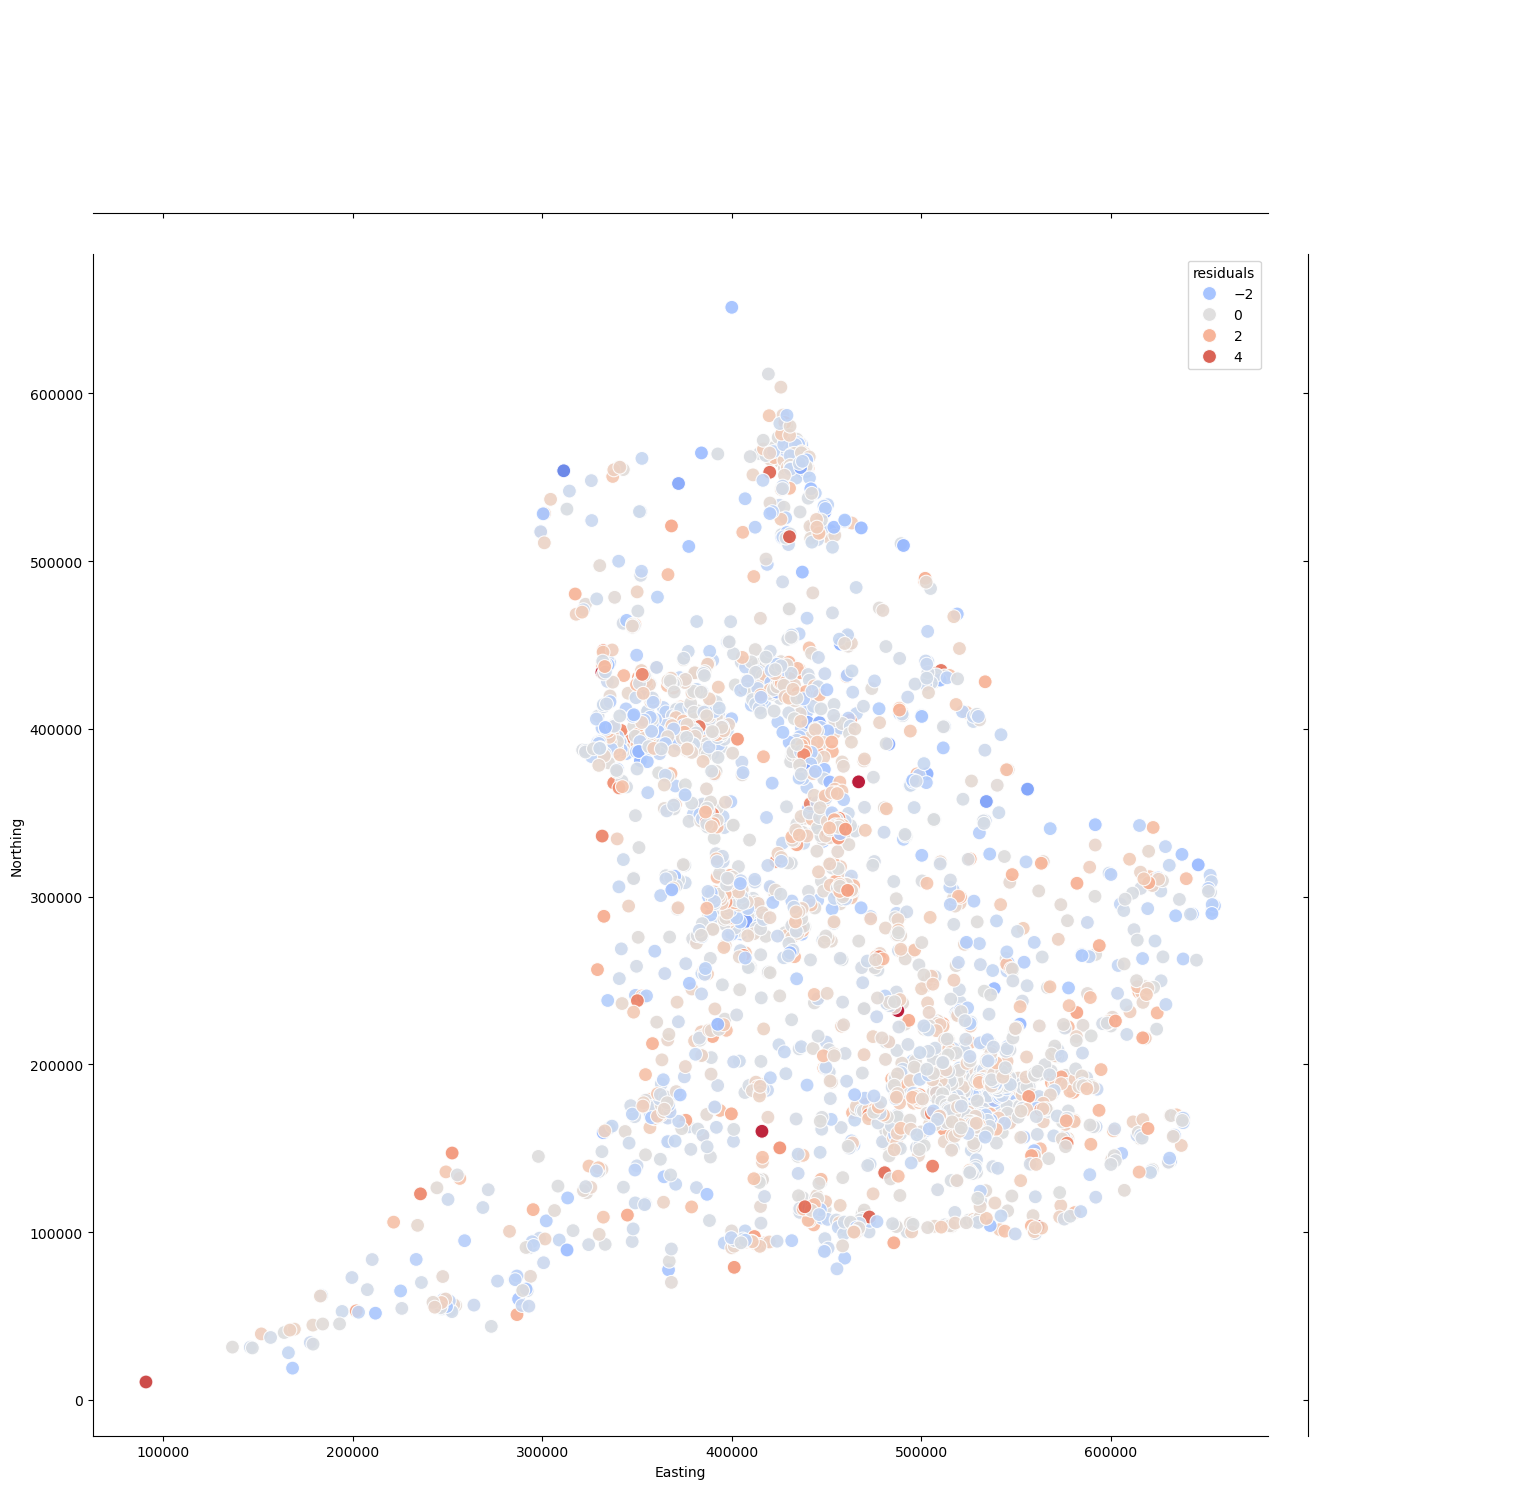

In [648]:
g = sns.JointGrid(data=data_with_coords, 
                  x='Easting', y='Northing', hue='residuals', height=15, marginal_ticks=False)

g.plot_joint(sns.scatterplot, s=100, alpha=0.9,
            hue_norm=(-5, 5), palette="coolwarm");

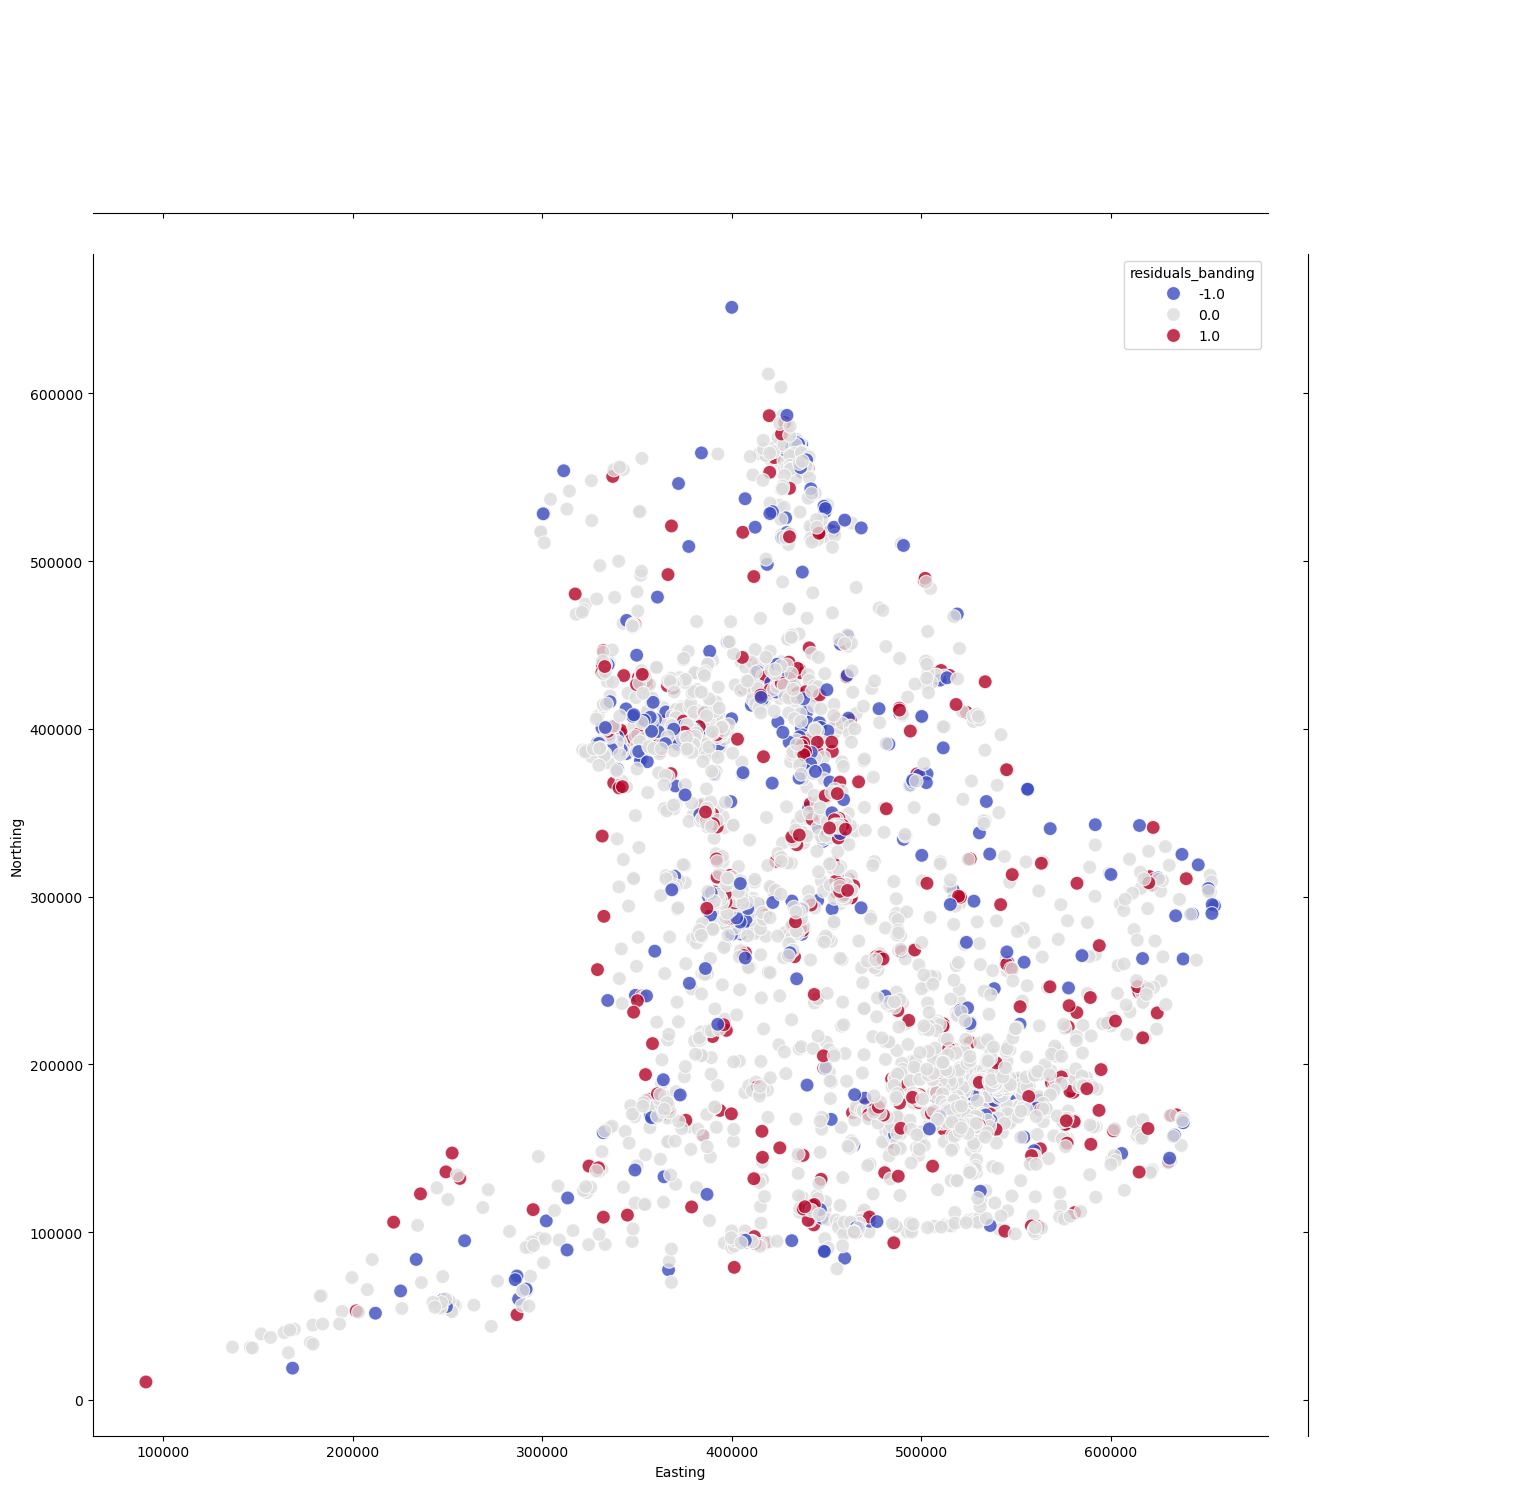

In [602]:
g = sns.JointGrid(data=data_with_coords, 
                  x='Easting', y='Northing', hue='residuals_banding', height=15, marginal_ticks=False)

g.plot_joint(sns.scatterplot, s=100, alpha=0.8,
            hue_norm=(-1, 1), palette="coolwarm");

## Groupby LSOA

In [315]:
LSOA_residuals = data.groupby('LSOA11')['residuals'].mean()

In [317]:
LSOA_residuals = pd.DataFrame(LSOA_residuals)
LSOA_residuals

residuals
LSOA11              
E01000031  -0.749526
E01000035   0.041182
E01000051  -0.248226
E01000061  -0.086691
E01000066   0.226985
...              ...
E01033693   5.193386
E01033701  -0.654812
E01033726   0.334445
E01033737  -1.221233
E01033745   0.517026

[2860 rows x 1 columns]

In [318]:
LSOA_residuals.to_csv('LSOA_residuals.csv', index=False)

Shape file source: https://statistics.ukdataservice.ac.uk/dataset/2011-census-geography-boundaries-lower-layer-super-output-areas-and-data-zones/resource/bf174b2e-fc72-449d-bbbf-b12e9892c88d 

In [321]:
map = gpd.read_file('infuse_lsoa_lyr_2011.shp')

In [326]:
map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42619 entries, 0 to 42618
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geo_code    42619 non-null  object  
 1   geo_label   42619 non-null  object  
 2   geo_labelw  6976 non-null   object  
 3   label       42619 non-null  object  
 4   name        42619 non-null  object  
 5   geometry    42619 non-null  geometry
dtypes: geometry(1), object(5)
memory usage: 2.0+ MB


<Axes: >

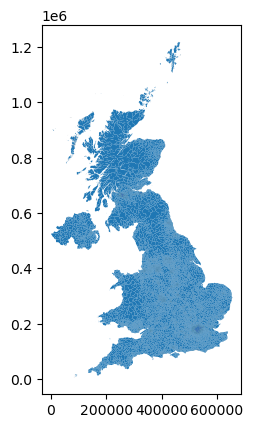

In [322]:
map.plot()

In [323]:
map.head()

geo_code       geo_label geo_labelw                        label  \
0  E01003513     Newham 035D       None  E92000001E09000025E01003513   
1  E01031647    Horsham 002D       None  E92000001E07000227E01031647   
2  E01022006   Tendring 002C       None  E92000001E07000076E01022006   
3  E01001159    Croydon 002C       None  E92000001E09000008E01001159   
4  E01008088  Sheffield 012B       None  E92000001E08000019E01008088   

             name                                           geometry  
0     Newham 035D  POLYGON ((541893.189 181249.621, 541900.568 18...  
1    Horsham 002D  POLYGON ((518376.682 132574.695, 518375.785 13...  
2   Tendring 002C  POLYGON ((623754.716 231042.037, 623759.75 231...  
3    Croydon 002C  POLYGON ((532233.977 170474.976, 532229.824 17...  
4  Sheffield 012B  POLYGON ((433539.233 392096.845, 433539.125 39...

In [324]:
england = map[map['geo_code'].str.startswith('E01')]

In [325]:
england.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 32844 entries, 0 to 42618
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geo_code    32844 non-null  object  
 1   geo_label   32844 non-null  object  
 2   geo_labelw  0 non-null      object  
 3   label       32844 non-null  object  
 4   name        32844 non-null  object  
 5   geometry    32844 non-null  geometry
dtypes: geometry(1), object(5)
memory usage: 1.8+ MB


<Axes: >

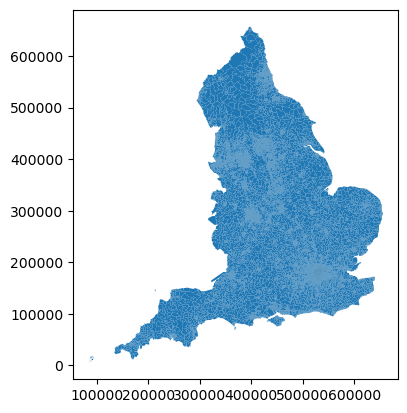

In [327]:
england.plot()

In [328]:
england_lsoa_residuals = pd.merge(england, LSOA_residuals, left_on='geo_code', right_on='LSOA11', how='left')

In [330]:
england_lsoa_residuals.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geo_code    32844 non-null  object  
 1   geo_label   32844 non-null  object  
 2   geo_labelw  0 non-null      object  
 3   label       32844 non-null  object  
 4   name        32844 non-null  object  
 5   geometry    32844 non-null  geometry
 6   residuals   2860 non-null   float64 
dtypes: float64(1), geometry(1), object(5)
memory usage: 1.8+ MB


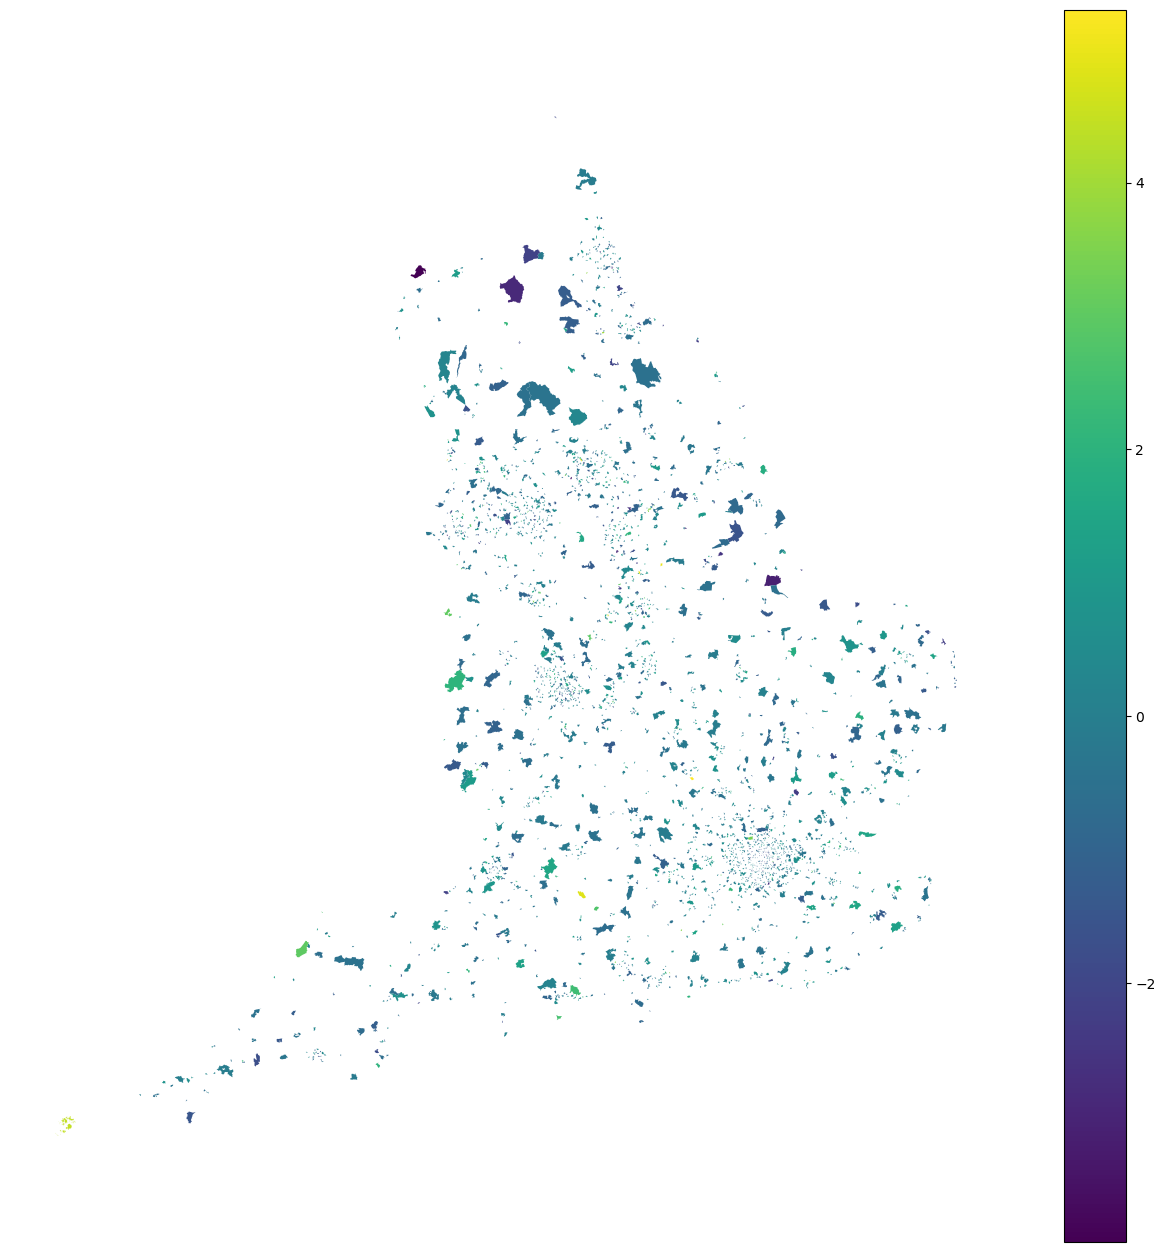

In [332]:
f,ax = plt.subplots(1, figsize=(16,16))
england_lsoa_residuals.plot(column='residuals', legend=True, ax=ax)

# remove axis
ax.set_axis_off()
plt.show();


## Groupby region

In [603]:
data_temp_london = data.copy()

In [604]:
data_temp_london['region_name'].replace('Inner London', 'London', inplace=True)
data_temp_london['region_name'].replace('Outer London', 'London', inplace=True)

In [605]:
region_residuals = data_temp_london.groupby('region_name')['residuals'].mean()

In [606]:
region_residuals = pd.DataFrame(region_residuals)
region_residuals

residuals
region_name                        
East Midlands              0.103043
East of England            0.078503
London                    -0.219023
North East                -0.157804
North West                -0.003751
South East                 0.158990
South West                 0.010315
West Midlands              0.020601
Yorkshire and The Humber   0.054266

region map source: https://statistics.ukdataservice.ac.uk/dataset/2011-census-geography-boundaries-regions/resource/cf403e93-6bc8-4f63-b4f3-b9e7c47e769a 

In [608]:
map = gpd.read_file('infuse_rgn_2011.shp')

In [609]:
map

geo_code                 geo_label      label                      name  \
0  E12000006           East of England  E12000006           East of England   
1  E12000003  Yorkshire and The Humber  E12000003  Yorkshire and The Humber   
2  E12000008                South East  E12000008                South East   
3  E12000004             East Midlands  E12000004             East Midlands   
4  E12000007                    London  E12000007                    London   
5  E12000009                South West  E12000009                South West   
6  E12000005             West Midlands  E12000005             West Midlands   
7  E12000002                North West  E12000002                North West   
8  E12000001                North East  E12000001                North East   

                                            geometry  
0  POLYGON ((617106.688 343482.308, 617111.01 343...  
1  POLYGON ((510758.595 482644.305, 510766.754 48...  
2  MULTIPOLYGON (((508236.589 171797.716, 508240....  
3  POLYGON ((454996.828 276726.552, 454974.133 27...  
4  POLYGON ((534527.083 200056.467, 534528.375 20...  
5  MULTIPOLYGON (((409873.806 239325.091, 409867....  
6  POLYGON ((431443.073 299111.23, 431449.304 299...  
7  POLYGON ((380424.183 522381.432, 380424.209 52...  
8  MULTIPOLYGON (((450648.313 535677.376, 450686....

In [610]:
england_map_residuals = pd.merge(map, region_residuals, left_on='name', right_on='region_name', how='left')

In [611]:
england_map_residuals

geo_code                 geo_label      label                      name  \
0  E12000006           East of England  E12000006           East of England   
1  E12000003  Yorkshire and The Humber  E12000003  Yorkshire and The Humber   
2  E12000008                South East  E12000008                South East   
3  E12000004             East Midlands  E12000004             East Midlands   
4  E12000007                    London  E12000007                    London   
5  E12000009                South West  E12000009                South West   
6  E12000005             West Midlands  E12000005             West Midlands   
7  E12000002                North West  E12000002                North West   
8  E12000001                North East  E12000001                North East   

                                            geometry  residuals  
0  POLYGON ((617106.688 343482.308, 617111.01 343...   0.078503  
1  POLYGON ((510758.595 482644.305, 510766.754 48...   0.054266  
2  MULTIPOLYGON (((508236.589 171797.716, 508240....   0.158990  
3  POLYGON ((454996.828 276726.552, 454974.133 27...   0.103043  
4  POLYGON ((534527.083 200056.467, 534528.375 20...  -0.219023  
5  MULTIPOLYGON (((409873.806 239325.091, 409867....   0.010315  
6  POLYGON ((431443.073 299111.23, 431449.304 299...   0.020601  
7  POLYGON ((380424.183 522381.432, 380424.209 52...  -0.003751  
8  MULTIPOLYGON (((450648.313 535677.376, 450686....  -0.157804

In [612]:
england_map_residuals['residuals'].describe()

count    9.000000
mean     0.005016
std      0.121550
min     -0.219023
25%     -0.003751
50%      0.020601
75%      0.078503
max      0.158990
Name: residuals, dtype: float64

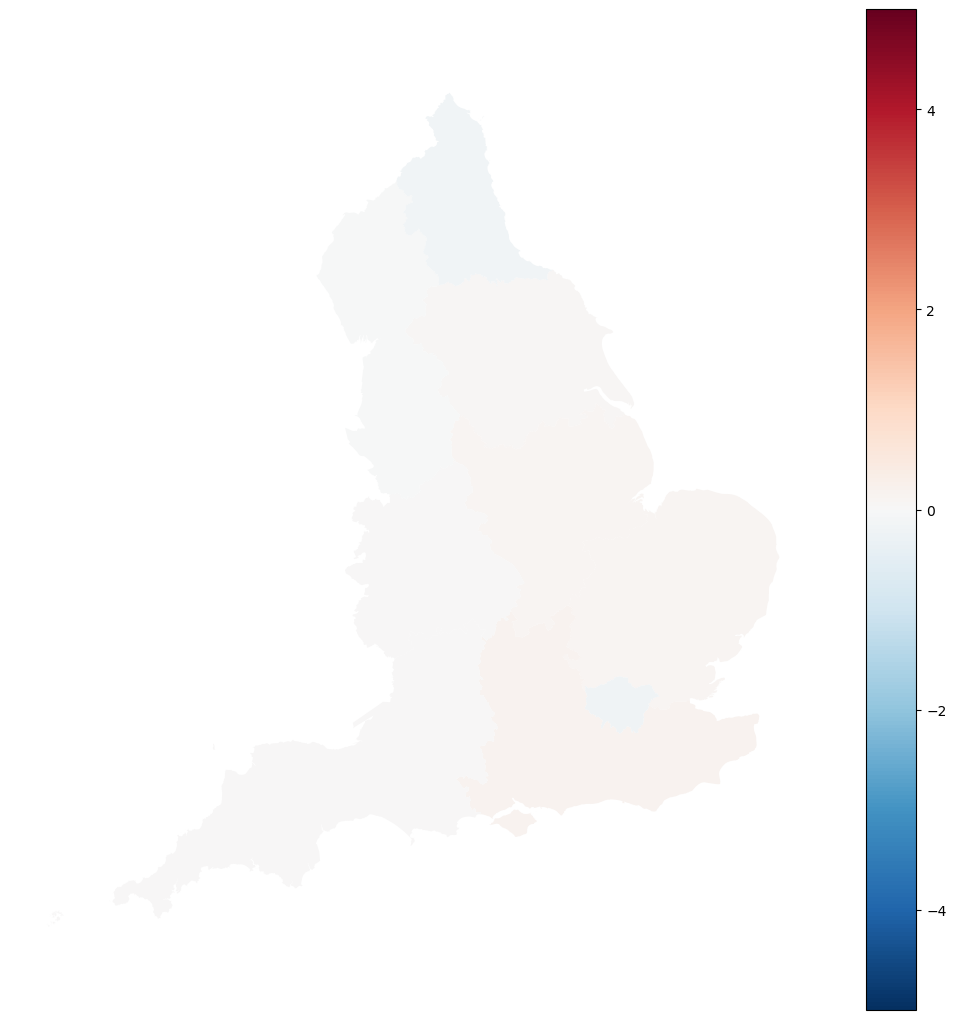

In [647]:
f,ax = plt.subplots(1, figsize=(13,13))
england_map_residuals.plot(column='residuals', 
                           cmap='RdBu_r',
                           vmin=-5,
                           vmax=5,
                           legend=True, 
                           ax=ax)

# remove axis
ax.set_axis_off()
plt.show();


## Groupby LA

In [614]:
la_code = pd.read_csv('model_data/la_code.csv', index_col=0)

In [615]:
la_code = la_code[['URN', 'la_name', 'district_administrative_name', 'district_administrative_code']]

In [616]:
la_code

URN                 la_name district_administrative_name  \
1      100000          City of London               City of London   
2      100001          City of London               City of London   
3      100002          City of London               City of London   
4      100003          City of London               City of London   
5      100005                  Camden                       Camden   
...       ...                     ...                          ...   
24438  149557               Wiltshire                    Wiltshire   
24439  149632  Kensington and Chelsea       Kensington and Chelsea   
24440  149633                Cornwall                     Cornwall   
24441  149635           Wolverhampton                Wolverhampton   
24442  149636                 Norfolk                    Breckland   

      district_administrative_code  
1                        E09000001  
2                        E09000001  
3                        E09000001  
4                        E09000001  
5                        E09000007  
...                            ...  
24438                    E06000054  
24439                    E09000020  
24440                    E06000052  
24441                    E08000031  
24442                    E07000143  

[24442 rows x 4 columns]

In [617]:
data_residuals = data[['URN', 'residuals']]

In [618]:
data_residuals

URN  residuals
1     137181  -0.333894
3     100050  -0.931817
4     100051  -1.519249
5     100052  -1.580987
6     100053  -0.539432
...      ...        ...
3141  137107  -1.833254
3142  137251   2.178209
3143  137338   0.166352
3144  136357  -1.132228
3146  135940   0.974016

[2972 rows x 2 columns]

In [619]:
data_la = data_residuals.merge(la_code, how='left', on='URN')

In [620]:
data_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URN                           2972 non-null   int64  
 1   residuals                     2972 non-null   float64
 2   la_name                       2972 non-null   object 
 3   district_administrative_name  2972 non-null   object 
 4   district_administrative_code  2972 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 116.2+ KB


In [621]:
la_residuals = data_la.groupby('district_administrative_code')['residuals'].mean()

In [622]:
la_residuals = pd.DataFrame(la_residuals)
la_residuals = la_residuals.reset_index()

In [623]:
la_residuals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   district_administrative_code  308 non-null    object 
 1   residuals                     308 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


la map source: 

In [624]:
map = gpd.read_file('infuse_dist_lyr_2011.shp')

<Axes: >

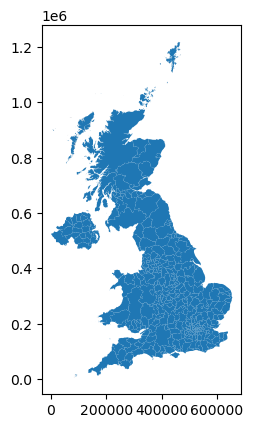

In [625]:
map.plot()

In [626]:

map[map['name'].str.contains('Cornwall')]

geo_code                 geo_label geo_labelw               label  \
51  E41000052  Cornwall,Isles of Scilly       None  E92000001E41000052   

                        name  \
51  Cornwall,Isles of Scilly   

                                             geometry  
51  MULTIPOLYGON (((185900.5 33613.7, 185894.609 3...

In [627]:
england = map[map['geo_code'].str.startswith('E')]

In [628]:
england

geo_code         geo_label geo_labelw               label  \
3    E07000138           Lincoln       None  E92000001E07000138   
4    E07000166     Richmondshire       None  E92000001E07000166   
5    E07000105           Ashford       None  E92000001E07000105   
8    E08000034          Kirklees       None  E92000001E08000034   
9    E07000126      South Ribble       None  E92000001E07000126   
..         ...               ...        ...                 ...   
398  E08000025        Birmingham       None  E92000001E08000025   
399  E07000049       East Dorset       None  E92000001E07000049   
400  E07000046          Torridge       None  E92000001E07000046   
401  E06000004  Stockton-on-Tees       None  E92000001E06000004   
403  E07000169             Selby       None  E92000001E07000169   

                 name                                           geometry  
3             Lincoln  POLYGON ((495362.339 373435.025, 495367.034 37...  
4       Richmondshire  POLYGON ((392540.053 507436.934, 392689 507651...  
5             Ashford  POLYGON ((585288.501 141699.702, 585334 141716...  
8            Kirklees  POLYGON ((423048.911 427817.21, 423068.08 4278...  
9        South Ribble  POLYGON ((343774.125 427166.469, 343873.812 42...  
..                ...                                                ...  
398        Birmingham  POLYGON ((408329.886 296917.67, 408330.059 296...  
399       East Dorset  POLYGON ((397287.219 107318.047, 397285.693 10...  
400          Torridge  MULTIPOLYGON (((240262.906 127104.094, 240265....  
401  Stockton-on-Tees  POLYGON ((438392.691 522207.088, 438392.094 52...  
403             Selby  POLYGON ((447309.814 444345.784, 447302.406 44...  

[324 rows x 6 columns]

### update geo codes in 'england' to match current codes

In [629]:
update_codes = pd.read_csv('geo_code_replacements.csv')

In [630]:
update_codes.head()

geo_code                       name district_administrative_code
0  E07000097         East Hertfordshire                    E07000242
1  E08000020                  Gateshead                    E08000037
2  E41000052  Cornwall, Isles of Scilly                    E06000052
3  E07000050               North Dorset                    E06000059
4  E07000101                  Stevenage                    E07000243

In [631]:
code_dict = dict(zip(update_codes['geo_code'], update_codes['district_administrative_code']))
code_dict

{'E07000097': 'E07000242',
 'E08000020': 'E08000037',
 'E41000052': 'E06000052',
 'E07000050': 'E06000059',
 'E07000101': 'E07000243',
 'E07000048': 'E06000058',
 'E07000190': 'E07000246',
 'E07000052': 'E06000059',
 'E07000201': 'E07000245',
 'E07000153': 'E06000061',
 'E06000048': 'E06000057',
 'E41000324': 'E09000033',
 'E07000205': 'E07000244',
 'E07000104': 'E07000241',
 'E07000156': 'E06000061',
 'E07000191': 'E07000246',
 'E07000151': 'E06000062',
 'E06000029': 'E06000058',
 'E07000004': 'E06000060',
 'E07000150': 'E06000061',
 'E07000053': 'E06000059',
 'E07000152': 'E06000061',
 'E07000204': 'E07000245',
 'E07000051': 'E06000059',
 'E07000005': 'E06000060',
 'E07000155': 'E06000062',
 'E07000006': 'E06000060',
 'E07000007': 'E06000060',
 'E07000206': 'E07000244',
 'E07000100': 'E07000240',
 'E06000028': 'E06000058',
 'E07000154': 'E06000062',
 'E07000049': 'E06000059'}

In [632]:
england_updated = england.copy()

In [633]:
england_updated['geo_code'] = england_updated['geo_code'].map(code_dict).fillna(england_updated['geo_code'])

In [634]:
england_updated

geo_code         geo_label geo_labelw               label  \
3    E07000138           Lincoln       None  E92000001E07000138   
4    E07000166     Richmondshire       None  E92000001E07000166   
5    E07000105           Ashford       None  E92000001E07000105   
8    E08000034          Kirklees       None  E92000001E08000034   
9    E07000126      South Ribble       None  E92000001E07000126   
..         ...               ...        ...                 ...   
398  E08000025        Birmingham       None  E92000001E08000025   
399  E06000059       East Dorset       None  E92000001E07000049   
400  E07000046          Torridge       None  E92000001E07000046   
401  E06000004  Stockton-on-Tees       None  E92000001E06000004   
403  E07000169             Selby       None  E92000001E07000169   

                 name                                           geometry  
3             Lincoln  POLYGON ((495362.339 373435.025, 495367.034 37...  
4       Richmondshire  POLYGON ((392540.053 507436.934, 392689 507651...  
5             Ashford  POLYGON ((585288.501 141699.702, 585334 141716...  
8            Kirklees  POLYGON ((423048.911 427817.21, 423068.08 4278...  
9        South Ribble  POLYGON ((343774.125 427166.469, 343873.812 42...  
..                ...                                                ...  
398        Birmingham  POLYGON ((408329.886 296917.67, 408330.059 296...  
399       East Dorset  POLYGON ((397287.219 107318.047, 397285.693 10...  
400          Torridge  MULTIPOLYGON (((240262.906 127104.094, 240265....  
401  Stockton-on-Tees  POLYGON ((438392.691 522207.088, 438392.094 52...  
403             Selby  POLYGON ((447309.814 444345.784, 447302.406 44...  

[324 rows x 6 columns]

In [635]:
england_la_residuals = pd.merge(england_updated, la_residuals, left_on='geo_code', right_on='district_administrative_code', how='left')

In [636]:
england_la_residuals.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   geo_code                      324 non-null    object  
 1   geo_label                     324 non-null    object  
 2   geo_labelw                    0 non-null      object  
 3   label                         324 non-null    object  
 4   name                          324 non-null    object  
 5   geometry                      324 non-null    geometry
 6   district_administrative_code  324 non-null    object  
 7   residuals                     324 non-null    float64 
dtypes: float64(1), geometry(1), object(6)
memory usage: 20.4+ KB


In [637]:
unmatched_rows = england_la_residuals[england_la_residuals['residuals'].isnull()]
print(unmatched_rows[['geo_code', 'geo_label']])

Empty DataFrame
Columns: [geo_code, geo_label]
Index: []


In [638]:
data['residuals'].describe()

count    2972.000000
mean        0.010124
std         0.998938
min        -3.900046
25%        -0.589492
50%        -0.049888
75%         0.494570
max         5.306354
Name: residuals, dtype: float64

In [639]:
england_la_residuals['residuals'].describe()

count    324.000000
mean       0.009461
std        0.468948
min       -1.535257
25%       -0.265622
50%       -0.007524
75%        0.325903
max        1.474689
Name: residuals, dtype: float64

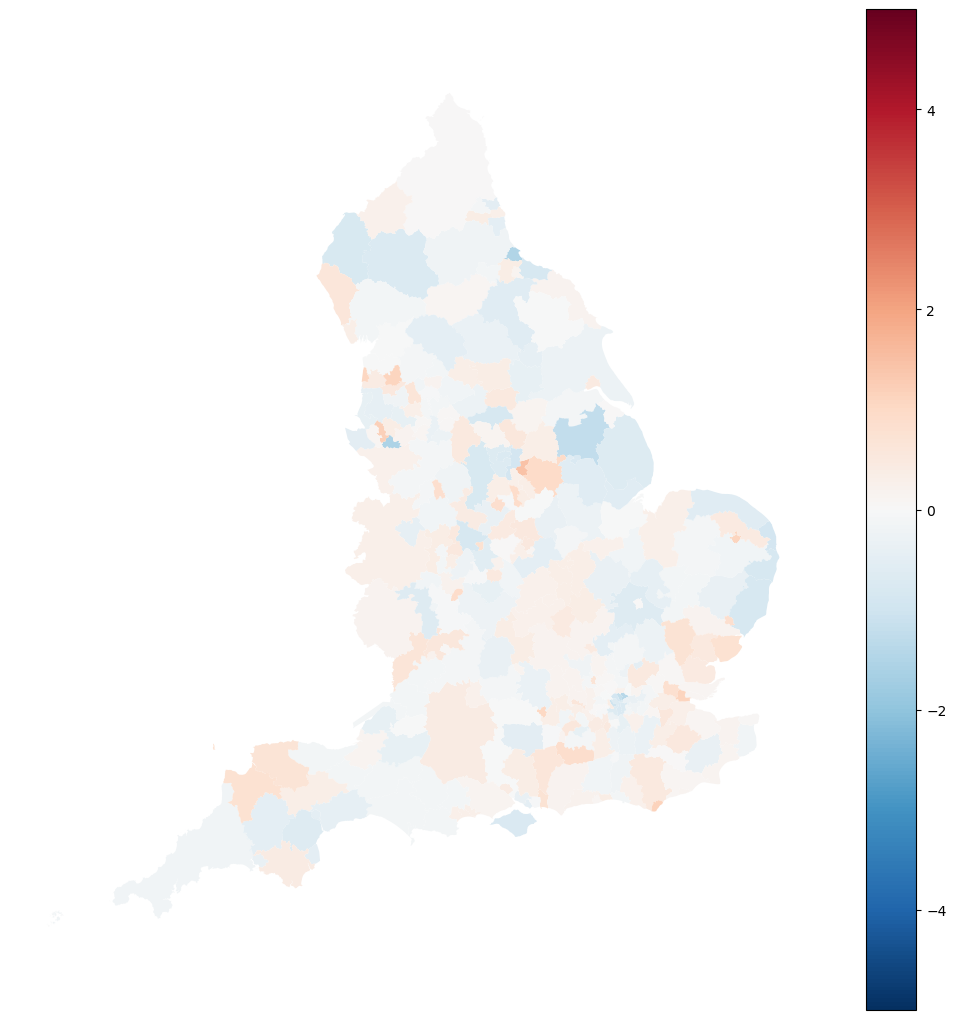

In [646]:
f,ax = plt.subplots(1, figsize=(13,13))
england_la_residuals.plot(column='residuals', 
                           cmap='RdBu_r',
                           vmin=-5,
                           vmax=5,
                           legend=True, 
                           ax=ax)

# remove axis
ax.set_axis_off()
plt.show();


# Plot means

In [46]:
data.describe()

URN  not_sustained_rate  total_absence  persistent_absence  \
count    2972.000000         2972.000000    2972.000000         2972.000000   
mean   133863.203567            5.354765       9.096770           26.750976   
std     12011.537035            3.670508       2.437697            8.591171   
min    100050.000000            0.000000       3.100000            2.800000   
25%    135760.750000            2.720164       7.500000           21.200000   
50%    137338.500000            4.591837       8.900000           26.600000   
75%    140412.750000            7.272727      10.400000           32.100000   
max    148866.000000           28.125000      32.600000           97.800000   

               FSM  White_British          EAL    perc_boys    headcount  \
count  2972.000000    2972.000000  2972.000000  2972.000000  2972.000000   
mean     24.482470      63.886137    17.662786    50.348293  1115.075034   
std      12.930734      28.961852    18.402224    16.637625   385.419425   
min       1.300000       0.000000     0.000000     0.000000    81.000000   
25%      14.700000      44.400000     4.500000    49.178838   847.000000   
50%      22.500000      75.300000    10.100000    50.977719  1082.000000   
75%      32.725000      87.300000    24.900000    53.044672  1359.000000   
max      75.400000      99.300000    92.700000   100.000000  2990.000000   

       perm_excl_rate    susp_rate  one_plus_susp_rate  KS4_headcount  \
count     2972.000000  2972.000000         2972.000000    2972.000000   
mean         0.243747    20.286441            7.579353     185.130552   
std          0.326898    24.449683            5.256525      61.606266   
min          0.000000     0.000000            0.000000      17.000000   
25%          0.000000     6.619397            3.917765     145.000000   
50%          0.134005    13.096390            6.508540     180.000000   
75%          0.345252    24.544380            9.902157     224.250000   
max          3.024910   358.064520           37.366550     451.000000   

       KS2_history  Attainment_8   Progress_8    selective  KS4_pass_rate  \
count  2972.000000   2972.000000  2972.000000  2972.000000    2972.000000   
mean    104.437248     47.261137    -0.001413     0.053499      24.690108   
std       2.745410      9.261298     0.505607     0.225065      18.675961   
min      92.100000     18.800000    -3.380000     0.000000       0.000000   
25%     102.800000     41.300000    -0.330000     0.000000      11.000000   
50%     104.200000     46.100000    -0.010000     0.000000      20.000000   
75%     105.500000     51.500000     0.330000     0.000000      33.000000   
max     117.400000     87.600000     2.370000     1.000000     100.000000   

            post16  sen_support         ehcp         IMD  pupil_teacher_ratio  \
count  2972.000000  2972.000000  2972.000000  2972.00000          2972.000000   
mean      0.625841    12.866762     2.529875     5.66319            16.897241   
std       0.483986     5.493081     1.680185     2.81924             2.295918   
min       0.000000     0.403226     0.000000     1.00000             5.300000   
25%       0.000000     9.227085     1.427036     3.00000            15.600000   
50%       1.000000    12.608697     2.238032     6.00000            16.800000   
75%       1.000000    16.039934     3.227958     8.00000            18.000000   
max       1.000000    48.316252    18.468468    10.00000            43.400000   

       assistant_teacher_ratio  absence_rate_non_excl  single_sex_binary  
count              2972.000000            2972.000000        2972.000000  
mean                  0.230585               8.819434           0.113392  
std                   0.120709               2.263271           0.317124  
min                   0.000000               3.034038           0.000000  
25%                   0.100000               7.330413           0.000000  
50%                   0.200000               8.653188           0.000000  
75%          

In [47]:
ns_mean = data['not_sustained_rate'].mean()
ns_mean

5.354764612450533